# How Trackeddy works

This algorithm identifies eddies when their outer most contours can be fitted by an ellipse (A. Fernandes and S. Nascimento, (2006)), also the area of the eddy contour should be smaller than 
\begin{equation}
 2\pi L_r
\end{equation}
(Klocker, A., & Abernathey, R. (2014)), the eccentricity of the fitted ellipse must be smaller than 
\begin{equation}
\frac{b}{2a}
\end{equation}
and the field profile along the minor and major axis of the fitted ellipse must adjust to a Gaussian. 

Optionally, an additional criterion is implemented when the 2D Gaussian fitting is allowed, this criterion identifies eddies only if the fitted 2D Gaussian correlates over 90%.

In [1]:
# Importing all libraries.
from pylab import *
from netCDF4 import Dataset
import os
import cmocean as cm
from trackeddy.tracking import *
from trackeddy.datastruct import *
from trackeddy.geometryfunc import *
from trackeddy.init import *
from trackeddy.physics import *
from trackeddy.plotfunc import *

import matplotlib.pyplot as plt, mpld3

#Allow interactive plots
%matplotlib inline

In [2]:
# Model output path
outputpath = '/g/data3/hh5/tmp/akm157/mom01v5_kds75/output306/'
# Import SSH/eta values to python environment.
ncfile     = Dataset(outputpath+'rregionsouthern_ocean_daily_eta_t.nc')
eta        = ncfile.variables['eta_t'][:]
# Import geographic coordinates (Lon,Lat)
lon        = ncfile.variables['xt_ocean_sub01'][:]
lat        = ncfile.variables['yt_ocean_sub01'][:]
eta[eta.data==-1e+20]=np.nan

In [3]:
# Import SSH 10 yrs mean values to python environment (Make sure the mean and data is in the same grid).
ncfile   = Dataset('/home/156/jm5970/github/trackeddy/data.input/meanssh_10yrs_AEXP.nc')
ssh_mean = squeeze(ncfile.variables['SSH_mean'][:])/100

In [4]:
# Remask each time step (Not necesary if your mask don't change on time, otherwise uncomment line bellow).
#mask=ma.getmask(eta[0,:,:])

# Area of interest [[min_xindex,max_xindex],[min_yindex,max_yindex]
areamap = array([[3050,3250],[725,885]])

## Plot section of interest.

(array([], dtype=float64), <a list of 0 Text yticklabel objects>)

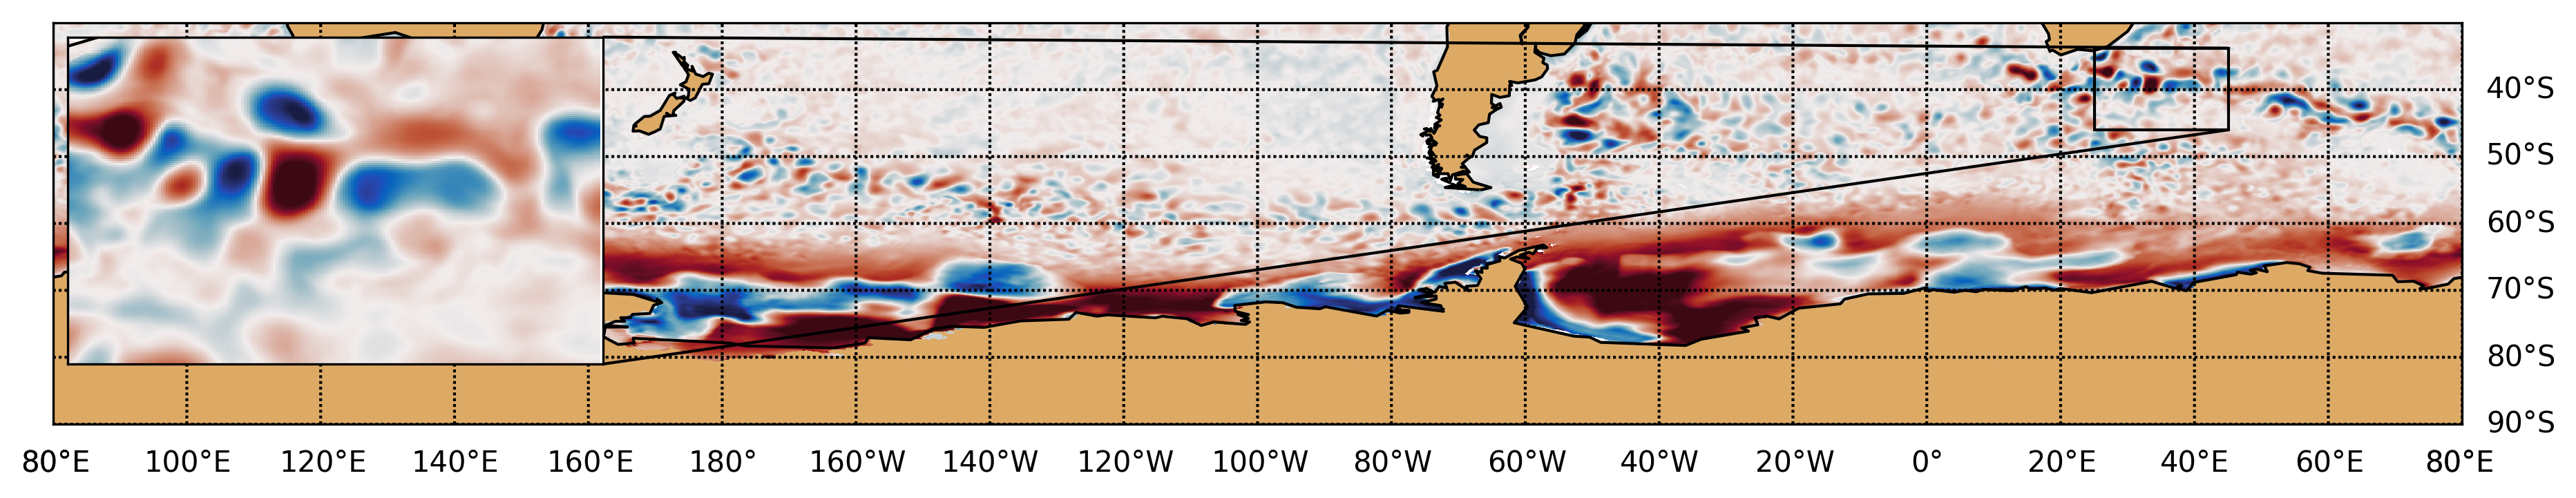

In [5]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
import numpy as np

fig = plt.figure(figsize=[15,5],dpi=300)
ax = fig.add_subplot(111)

map = Basemap(projection='cyl', 
              lat_0=0, lon_0=-100)

map.fillcontinents(color='#ddaa66', lake_color='#7777ff', zorder=0)
map.drawcoastlines()

x, y = map(lon, lat)

map.pcolormesh(x, y,eta[0,:,:]-ssh_mean,cmap=cm.cm.balance,vmin=-0.5,vmax=0.5)
ax.set_ylim(-90, -30)

parallels = np.arange(-90.,-30.,10.)
# labels = [left,right,top,bottom]
map.drawparallels(parallels,labels=[False,True,True,False])
meridians = np.arange(0.,360.,20.)
map.drawmeridians(meridians,labels=[True,False,False,True])

axins = zoomed_inset_axes(ax, 4, loc=2)

axins.set_xlim(0, 40)
axins.set_ylim(-45, -30)

map2 = Basemap(llcrnrlon=x[areamap[0,0]],llcrnrlat=y[areamap[1,0]],
               urcrnrlon=x[areamap[0,1]],urcrnrlat=y[areamap[1,1]], ax=axins)
map2.fillcontinents()
map2.drawcoastlines()
map2.drawcountries()
map2.pcolormesh(x[areamap[0,0]:areamap[0,1]],y[areamap[1,0]:areamap[1,1]],\
                eta[0,areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]]\
                -ssh_mean[areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]],cmap=cm.cm.balance,vmin=-0.5,vmax=0.5)

mark_inset(ax, axins, loc1=1, loc2=4, fc="none", ec="0")

plt.xticks(visible=False)
plt.yticks(visible=False)

### Main function
**analyseddyzt** is the principal function in trackeddy. It analyses and tracks edddies on time (More information at help(analyseddyzt) or the function). 

Additionally this function prints different diagnostics, in this case it's printing the diagnostics for the ellipse fitting. 

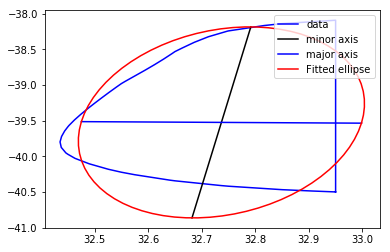

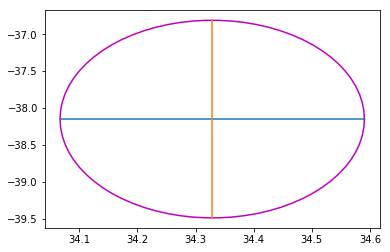

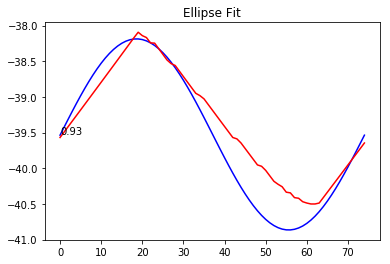

-2964.413646869005 -2952.6809553794155
----- New Eddy -----
Eddy Number (No time tracking): 0
Ellipse parameters
Ellipse center =  [32.73674692297972, -39.525372309689416]
Mass center =  [ 33.11419519 -39.33395599]
angle of rotation =  0.04098508200242971
axes (a,b) =  [0.2617207185141744, 1.3404946678229224]
Eccentricity =  0.9807551185855102
Area (cont,ellips) =  55394325333.20068 13635750669.300072
Ellipse adjust =  0.934194298903954 True
Mayor Gauss fit =  False
Minor Gauss fit =  False
Conditions | Area | Ellipse | Eccen | Gaussians 
           |  False  |  True |  False  |  False


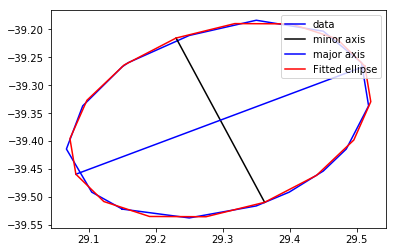

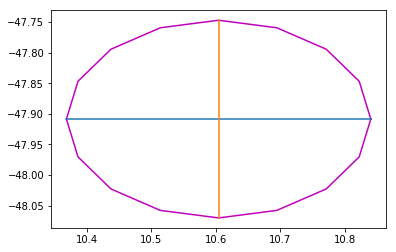

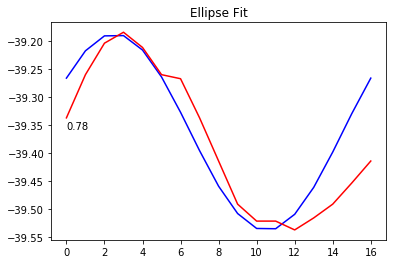

-669.0655579217569 -669.4188033021518
----- New Eddy -----


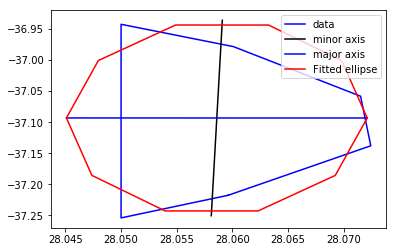

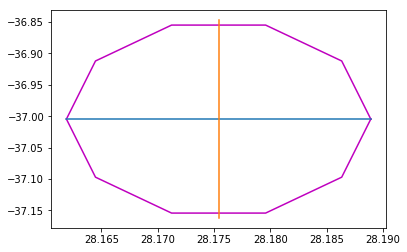

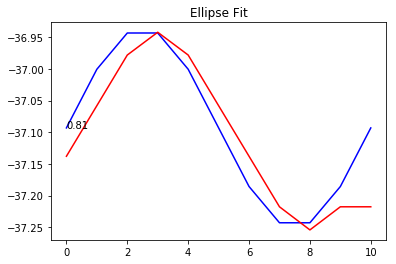

-408.02498114126547 -408.19791946568586
----- New Eddy -----


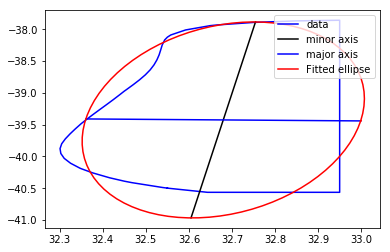

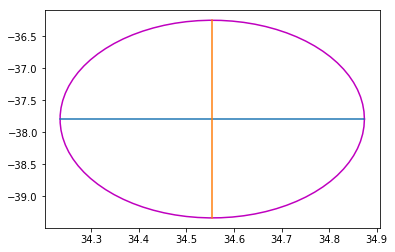

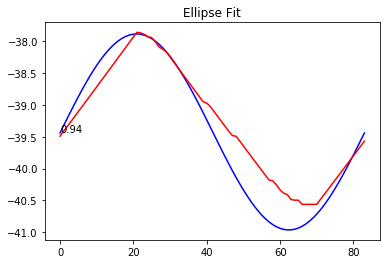

-3311.7050163504086 -3299.2585457635087
----- New Eddy -----
Eddy Number (No time tracking): 0
Ellipse parameters
Ellipse center =  [32.67968495193583, -39.42487512329828]
Mass center =  [ 33.07411973 -39.3261027 ]
angle of rotation =  0.04855053726430166
axes (a,b) =  [0.31950391437890396, 1.5430865232415272]
Eccentricity =  0.9783292855328205
Area (cont,ellips) =  70108160487.72998 19292001807.57981
Ellipse adjust =  0.9420094372667908 True
Mayor Gauss fit =  False
Minor Gauss fit =  False
Conditions | Area | Ellipse | Eccen | Gaussians 
           |  False  |  True |  False  |  False


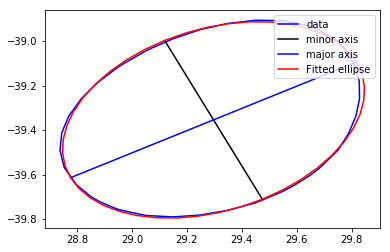

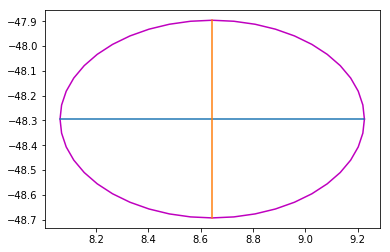

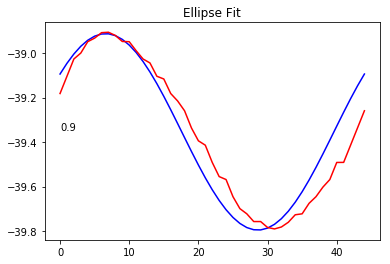

-1770.6821418178024 -1771.1621026902287
----- New Eddy -----
Eddy Number (No time tracking): 1
Ellipse parameters
Ellipse center =  [29.29687285334705, -39.35426747561277]
Mass center =  [ 29.30039706 -39.35225064]
angle of rotation =  -0.4628191519275465
axes (a,b) =  [0.5821066589448701, 0.3986446875200195]
Eccentricity =  0.7287019255755296
Area (cont,ellips) =  7467184247.639788 9266286325.334528
Ellipse adjust =  0.9002499271236942 True
Mayor Gauss fit =  True
Minor Gauss fit =  True
Conditions | Area | Ellipse | Eccen | Gaussians 
           |  True  |  True |  True  |  True


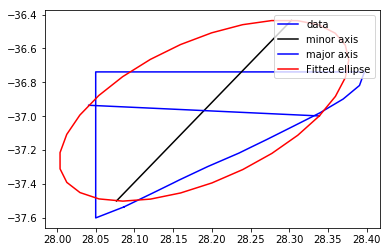

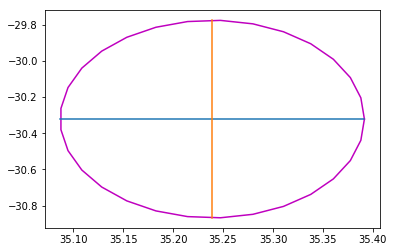

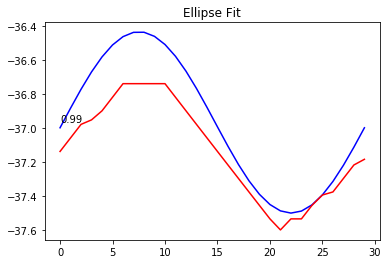

-1109.0353191698289 -1113.9061644819794
----- New Eddy -----
Eddy Number (No time tracking): 1
Ellipse parameters
Ellipse center =  [28.18986149319128, -36.966792037223286]
Mass center =  [ 27.75320498 -37.09838863]
angle of rotation =  0.20876332873240985
axes (a,b) =  [0.1522702865482893, 0.5454631144363836]
Eccentricity =  0.9602452390273242
Area (cont,ellips) =  7328905793.348103 3928076328.7312717
Ellipse adjust =  0.9890545824961092 True
Mayor Gauss fit =  False
Minor Gauss fit =  False
Conditions | Area | Ellipse | Eccen | Gaussians 
           |  True  |  True |  False  |  False
 0% [====================>]100% |Elapsed Time:8 s| Estimated Time:8 s |N eddies: 3|


{'eddyn_0': {'neddy': [0],
  'time': array([0]),
  'position_default': [array([ 29.30039706, -39.35225064])],
  'area': 7467184247.639788,
  'ellipse': [[array([29.81774037, 29.78710894, 29.74649772, 29.69673344, 29.63882915,
           29.57396361, 29.5034573 , 29.42874553, 29.35134922, 29.27284392,
           29.19482778, 29.11888898, 29.04657343, 28.97935324, 28.91859685,
           28.86554106, 28.82126594, 28.7866728 , 28.76246587, 28.74913793,
           28.74696028, 28.75597727, 28.77600534, 28.80663677, 28.84724798,
           28.89701227, 28.95491656, 29.0197821 , 29.0902884 , 29.16500017,
           29.24239649, 29.32090179, 29.39891793, 29.47485672, 29.54717228,
           29.61439246, 29.67514886, 29.72820465, 29.77247977, 29.8070729 ,
           29.83127983, 29.84460778, 29.84678542, 29.83776843, 29.81774037]),
    array([-39.09437289, -39.04625365, -39.00440469, -38.96967793,
           -38.94278029, -38.92425936, -38.91449214, -38.91367749,
           -38.92183197, -38.9

In [6]:
# Smaller area to avoid over-printing diagnostics.
areamap_small=array([[3080,3130],[800,850]])

analyseddyzt(eta,lon,lat,0,1,1,0.3,0.2,0.1,data_meant=ssh_mean,areamap=areamap_small,mask='',maskopt='contour'\
                     ,destdir='',physics='',diagnostics='ellipse',pprint=False)

### Ellipse Fitting
Eddy countours can be represent by ellipses. Therefore Therefore,
in this algorithm the optimal ellipse is fitted to any close contour and in
order to determine if it corresponds to an eddy, the correlation between the
fitted ellipse and the close contour should be within the interval ($e$)
\begin{equation}
0.85 < e \leq 1
\end{equation}
The next block only uses the ellipse fitting criterion (Extreme possible values 
were imposed in the additional criteria)

In [7]:
eddyp=analyseddyzt(eta,lon,lat,0,1,1,0.8,0.01,0.01,data_meant=ssh_mean,areamap=areamap,mask='',maskopt='contour'\
                   ,eccenfit=1,gaussrsquarefit=0,ellipsrsquarefit=0.85\
                   ,destdir='',physics='',diagnostics=False,pprint=False)

 0% [====================>]100% |Elapsed Time:22 s| Estimated Time:22 s |N eddies: 10|


In [8]:
eddyn=analyseddyzt(eta,lon,lat,0,1,1,-0.8,-0.01,-0.01,data_meant=ssh_mean,areamap=areamap,mask='',maskopt='contour'\
                     ,eccenfit=1,gaussrsquarefit=0,ellipsrsquarefit=0.85\
                     ,destdir='',physics='',diagnostics=False,pprint=False)

 0% [====================>]100% |Elapsed Time:22 s| Estimated Time:22 s |N eddies: 21|


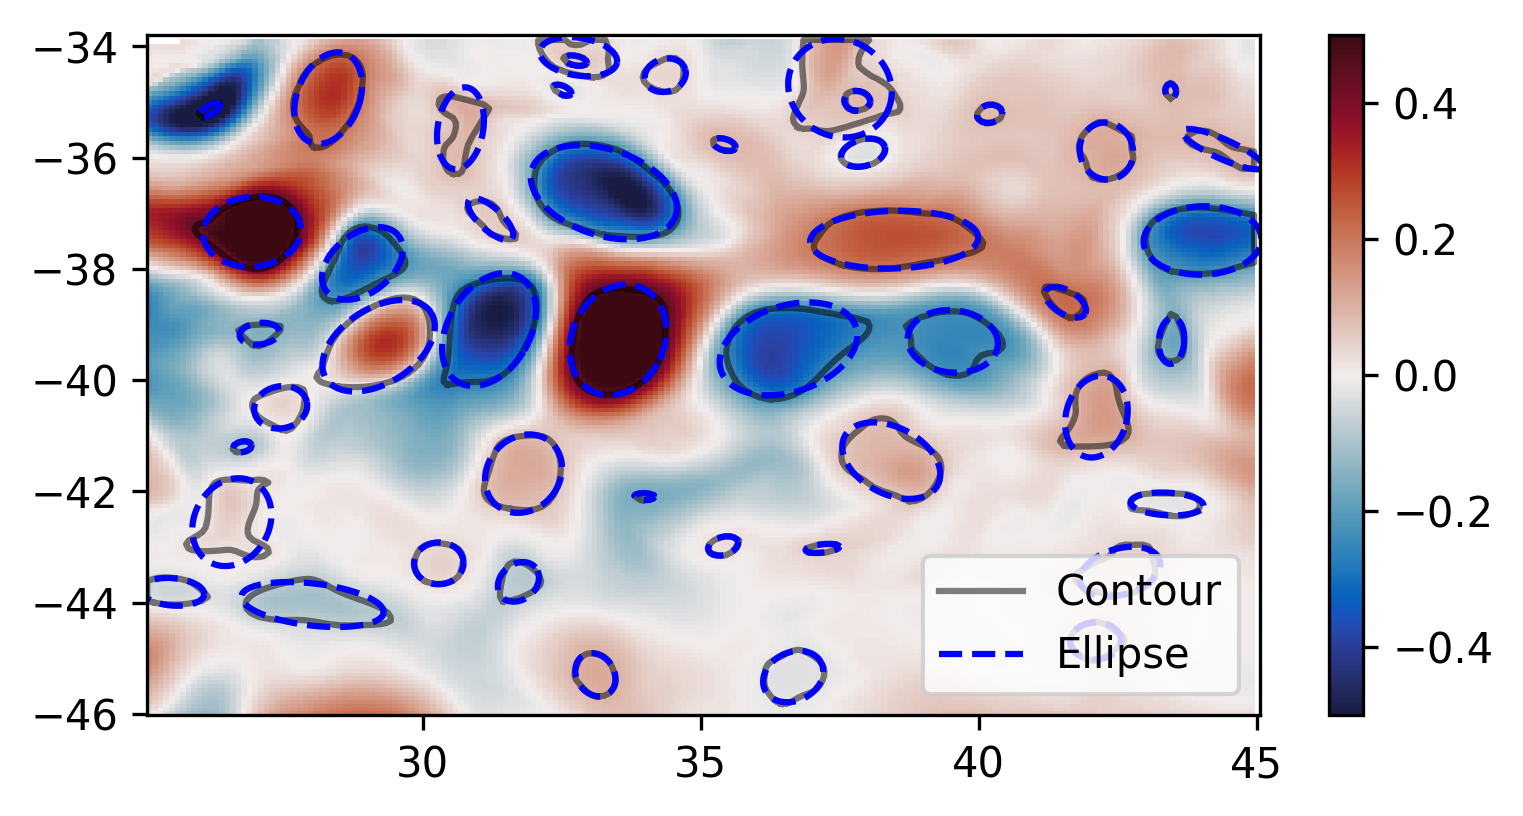

In [9]:
plt.figure(figsize=[6,3],dpi=300)
pcolormesh(x[areamap[0,0]:areamap[0,1]],y[areamap[1,0]:areamap[1,1]],\
           eta[0,areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]]\
           -ssh_mean[areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]],cmap=cm.cm.balance,vmin=-0.5,vmax=0.5)
count=0
for key,value in eddyp.items():

    plot(value['contour'][0][0],value['contour'][0][1],'-k',alpha=0.5,label='Contour')
    plot(value['ellipse'][0][0],value['ellipse'][0][1],'--b',label='Ellipse')
    if count==0:
        legend(loc=4)
        count=1
for key,value in eddyn.items():
    plot(value['contour'][0][0],value['contour'][0][1],'-k',alpha=0.5,label='Contour')
    plot(value['ellipse'][0][0],value['ellipse'][0][1],'--b',label='Ellipse')
    
xlim(x[areamap[0,0]],x[areamap[0,1]])
ylim(y[areamap[1,0]],y[areamap[1,1]])

colorbar()
plt.axes().set_aspect('equal')

### Area Checker
The eddy area ($A_{eddy}$) was defined as a box with sides
of two semi-minor axis and two semi-major axis of the fitted ellipse and 
according to the eddy length scale the area of any identified eddy 
should be less or equal to a square with sides two times the Rossby Radius.

In [10]:
print("| {:<8} | {:<20} | {:<20} | {:<10} | ".format('Key','Rossby','Contour','Condition'))
print("_"*71)
for key,item in eddyp.items():
    rossby=round(2*pi*rossbyR(mean(item['contour'][0][0]),mean(item['contour'][0][1]))**2)
    print("| {:<8} | {:<20} | {:<20} | {:<10} | ".format(key, rossby,
          round(item['area'][0]),str(item['area'][0]<rossby)))

| Key      | Rossby               | Contour              | Condition  | 
_______________________________________________________________________
| eddyn_0  | 229117449506.0       | 16971507927.0        | True       | 
| eddyn_1  | 224064508154.0       | 34845169281.0        | True       | 
| eddyn_2  | 327646137578.0       | 28403849124.0        | True       | 
| eddyn_3  | 216788685403.0       | 24894942826.0        | True       | 
| eddyn_4  | 321830368149.0       | 10922740347.0        | True       | 
| eddyn_5  | 251564518420.0       | 3091834674.0         | True       | 
| eddyn_6  | 120394882174.0       | 16573300643.0        | True       | 
| eddyn_7  | 148430629306.0       | 20595883195.0        | True       | 
| eddyn_8  | 83624255881.0        | 5272168272.0         | True       | 
| eddyn_9  | 173772823231.0       | 16653368918.0        | True       | 
| eddyn_10 | 335207895004.0       | 10808474086.0        | True       | 
| eddyn_11 | 342284392542.0       | 19634949145.0   

In [11]:
eddyp=analyseddyzt(eta,lon,lat,0,1,1,0.8,0.01,0.01,data_meant=ssh_mean,areamap=areamap,mask='',maskopt='contour'\
                   ,destdir='',physics='',diagnostics=False,pprint=False)

 0% [====================>]100% |Elapsed Time:22 s| Estimated Time:22 s |N eddies: 10|


In [12]:
eddyn=analyseddyzt(eta,lon,lat,0,1,1,-0.8,-0.01,-0.01,data_meant=ssh_mean,areamap=areamap,mask='',maskopt='contour'\
                     ,destdir='',physics='',diagnostics=False,pprint=False)

 0% [====================>]100% |Elapsed Time:21 s| Estimated Time:21 s |N eddies: 21|


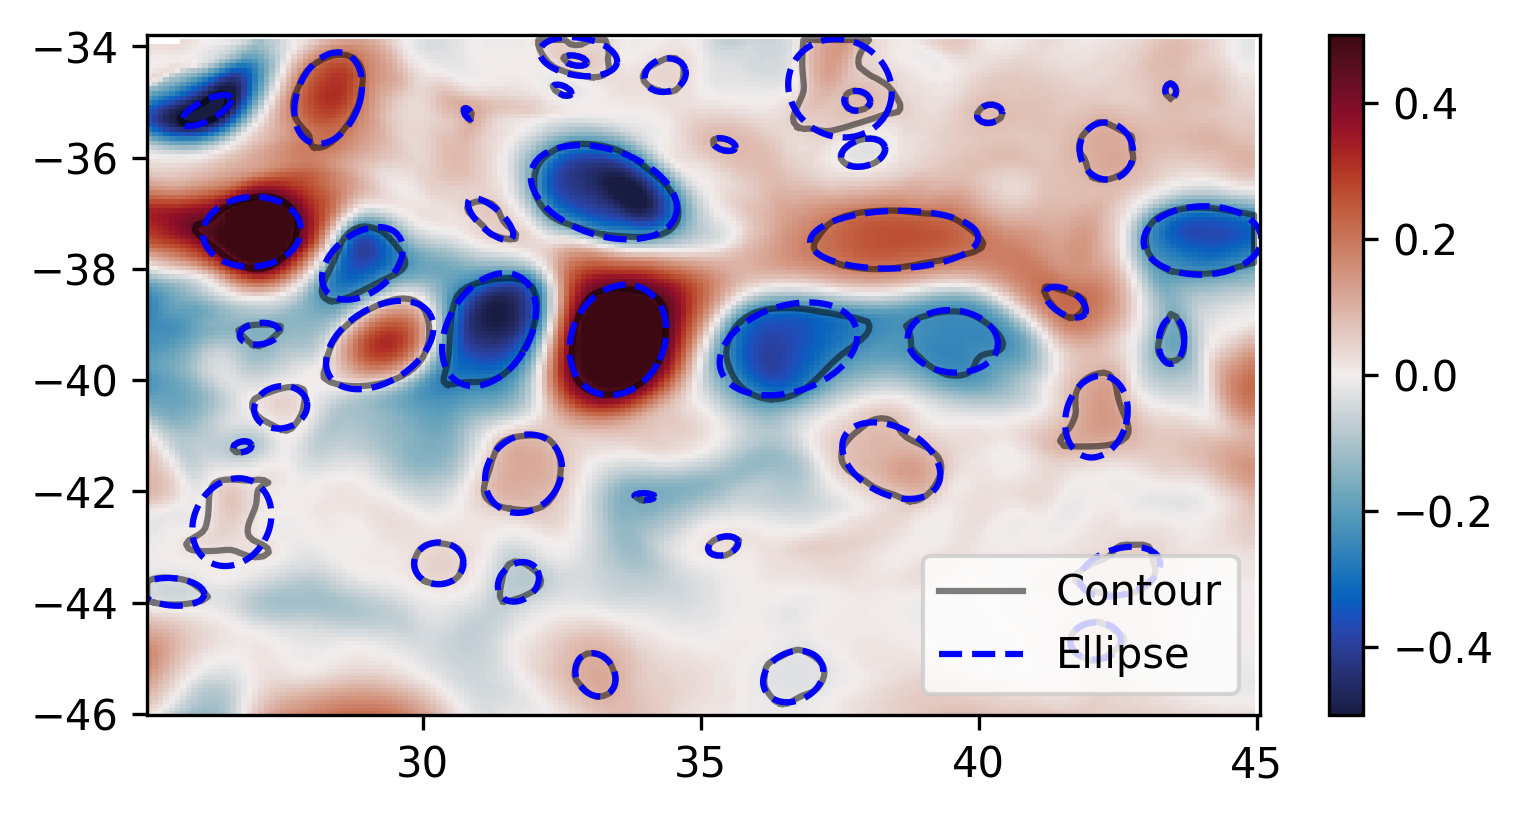

In [13]:
plt.figure(figsize=[6,3],dpi=300)
pcolormesh(x[areamap[0,0]:areamap[0,1]],y[areamap[1,0]:areamap[1,1]],\
           eta[0,areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]]\
           -ssh_mean[areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]],cmap=cm.cm.balance,vmin=-0.5,vmax=0.5)
count=0
for key,value in eddyp.items():

    plot(value['contour'][0][0],value['contour'][0][1],'-k',alpha=0.5,label='Contour')
    plot(value['ellipse'][0][0],value['ellipse'][0][1],'--b',label='Ellipse')
    if count==0:
        legend(loc=4)
        count=1
for key,value in eddyn.items():
    plot(value['contour'][0][0],value['contour'][0][1],'-k',alpha=0.5,label='Contour')
    plot(value['ellipse'][0][0],value['ellipse'][0][1],'--b',label='Ellipse')
    
xlim(x[areamap[0,0]],x[areamap[0,1]])
ylim(y[areamap[1,0]],y[areamap[1,1]])
colorbar()
plt.axes().set_aspect('equal')

In [14]:
fieldSp=reconstruct_syntetic(shape(eta),lon,lat,eddyp)

 0% [====================>]100% |Elapsed Time:5 s| Estimated Time:5 s |N eddies: eddyn_26|


In [15]:
fieldSn=reconstruct_syntetic(shape(eta),lon,lat,eddyn)

 0% [====================>]100% |Elapsed Time:3 s| Estimated Time:3 s |N eddies: eddyn_15|


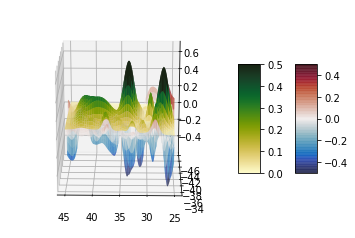

In [16]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import cmocean as cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

fig = plt.figure()
ax = fig.gca(projection='3d')

Lon,Lat=meshgrid(lon, lat)
surf = ax.plot_surface(Lon[areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]],\
                       Lat[areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]],\
                       eta[0,areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]]\
                       -ssh_mean[areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]],\
                       cmap=cm.cm.balance,vmin=-0.5,vmax=0.50,\
                       alpha=0.5,shade='gouraud',antialiased=True)
fig.colorbar(surf, shrink=0.5, aspect=5)

ssurf = ax.plot_surface(Lon[areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]],\
                        Lat[areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]],\
                       fieldSp[0,areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]],\
                       cmap=cm.cm.speed,vmin=0,vmax=0.5,\
                       alpha=1,shade='gouraud',antialiased=True)
ax.view_init(18, 91)
fig.colorbar(ssurf, shrink=0.5, aspect=5)

In [17]:
test=twoD_Gaussian((Lon,Lat,eddyp['eddyn_0']['position_maxvalue'][0][2],\
                    eddyp['eddyn_0']['position_maxvalue'][0][0],eddyp['eddyn_0']['position_maxvalue'][0][1]),\
                   *eddyp['eddyn_0']['2dgaussianfit'][0,:]).reshape(len(lat),len(lon))

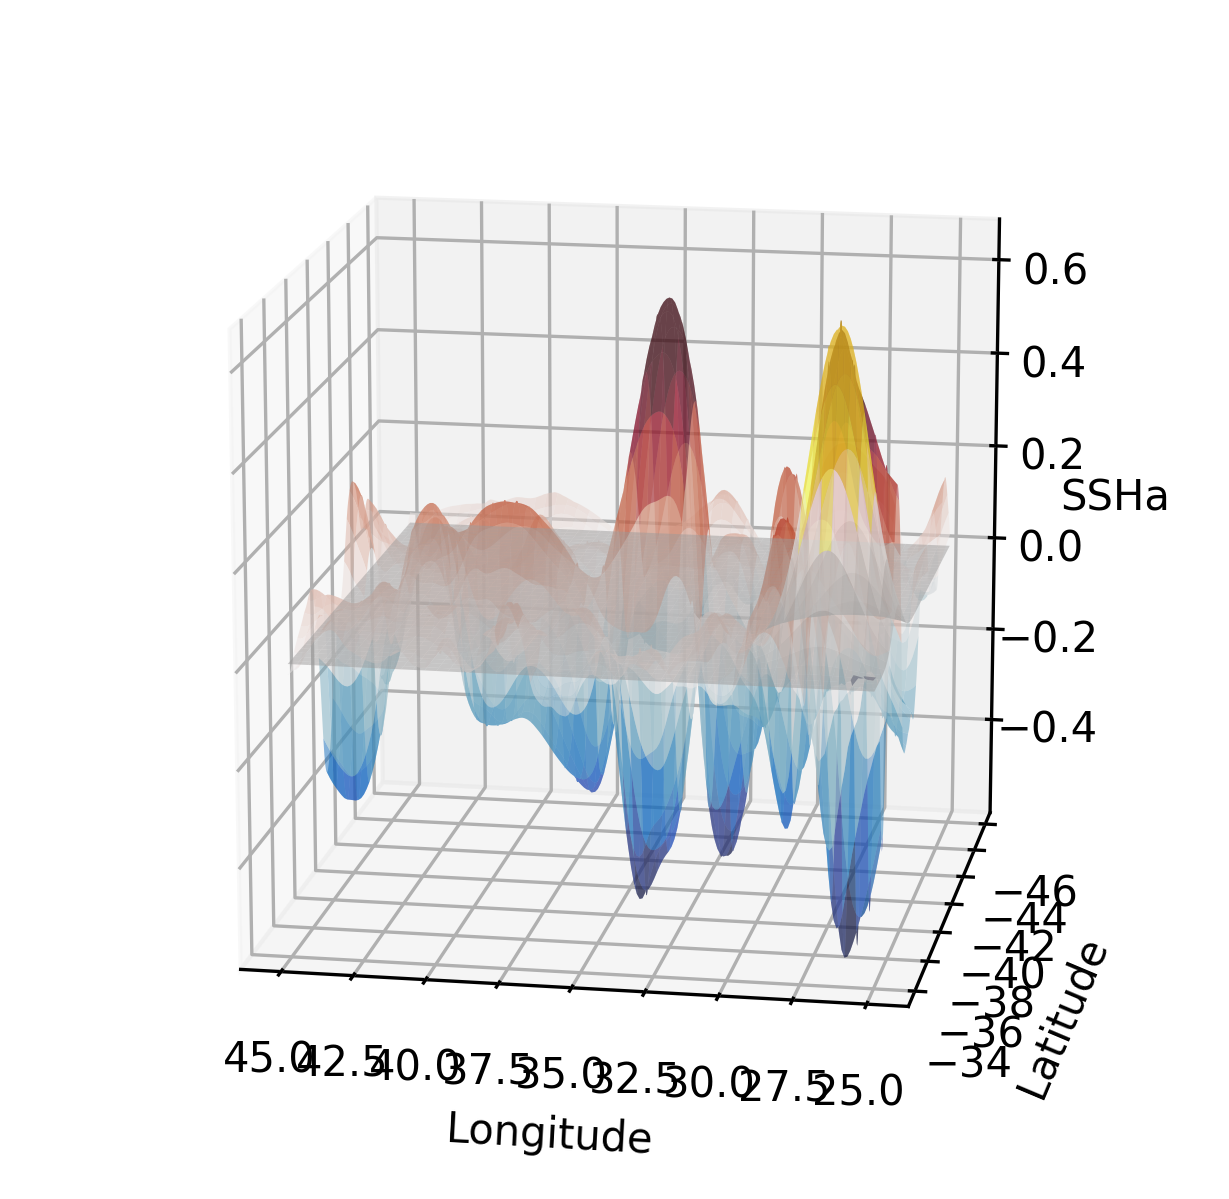

In [18]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import cmocean as cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

fig = plt.figure(figsize=(5,5),dpi=300)
ax = fig.gca(projection='3d')

Lon,Lat=meshgrid(lon, lat)
surf = ax.plot_surface(Lon[areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]],\
                       Lat[areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]],\
                       eta[0,areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]]\
                       -ssh_mean[areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]],cmap=cm.cm.balance,vmin=-0.5,vmax=0.5,\
                       alpha=0.5,shade='gouraud',antialiased=True)
#fig.colorbar(surf, shrink=0.8, aspect=10)

ssurf = ax.plot_surface(Lon[areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]],\
                       Lat[areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]],\
                       test[areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]],\
                       cmap=cm.cm.oxy,vmin=-0.5,vmax=0.5,\
                       alpha=0.5,shade='gouraud',antialiased=True)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('SSHa')
ax.view_init(15, 100)
#fig.colorbar(ssurf, shrink=0.8, aspect=10)

Text(0,0.5,'Latitude')

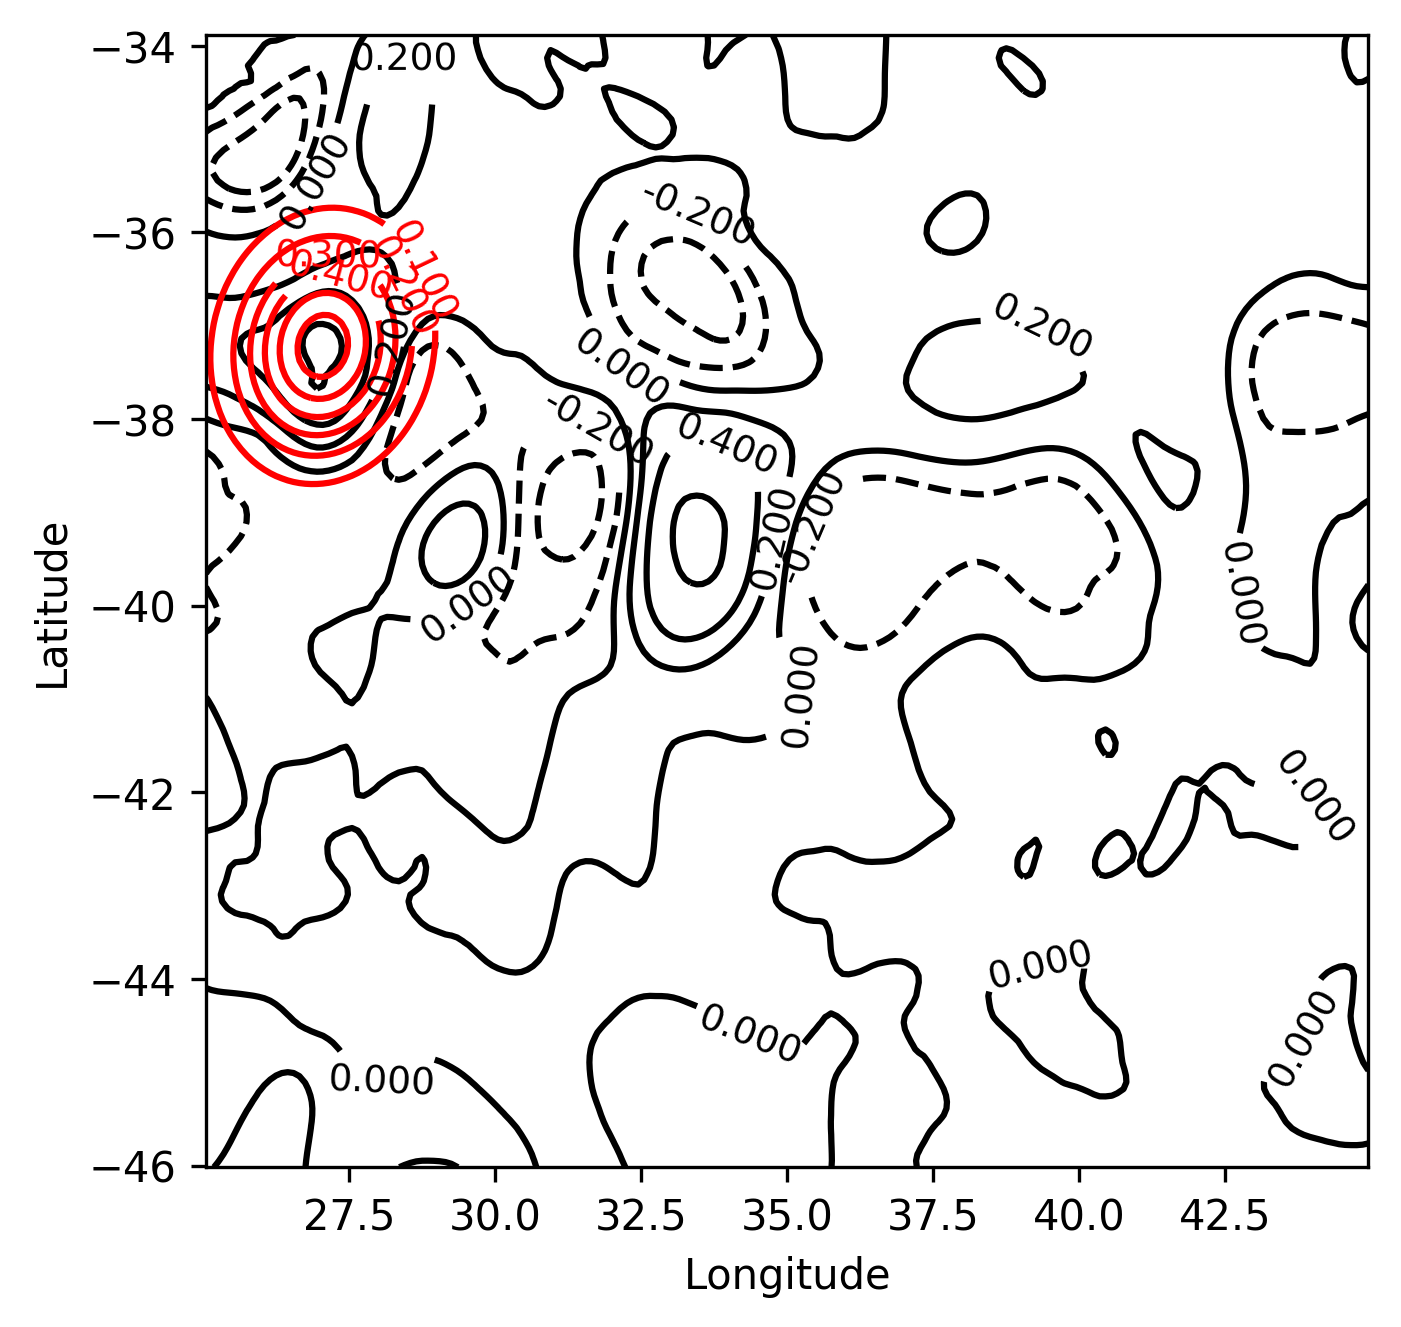

In [19]:
fig = plt.figure(figsize=(5,5),dpi=300)

CS=contour(Lon[areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]],\
                       Lat[areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]],\
                       eta[0,areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]]\
                       -ssh_mean[areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]],vmin=-0.50,vmax=0.50,colors='k')
clabel(CS, fontsize=9, inline=1)
#fig.colorbar(surf, shrink=0.8, aspect=10)

CS=contour(Lon[areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]],\
                       Lat[areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]],\
                       test[areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]],vmin=-0.50,vmax=0.50,colors='r')
clabel(CS, fontsize=9, inline=1)

xlabel('Longitude')
ylabel('Latitude')

In [20]:
test=twoD_Gaussian((Lon,Lat,eddyn['eddyn_0']['position_maxvalue'][0][2],\
                    eddyn['eddyn_0']['position_maxvalue'][0][0],eddyn['eddyn_0']['position_maxvalue'][0][1]),\
                   *eddyn['eddyn_0']['2dgaussianfit'][0,:]).reshape(len(lat),len(lon))

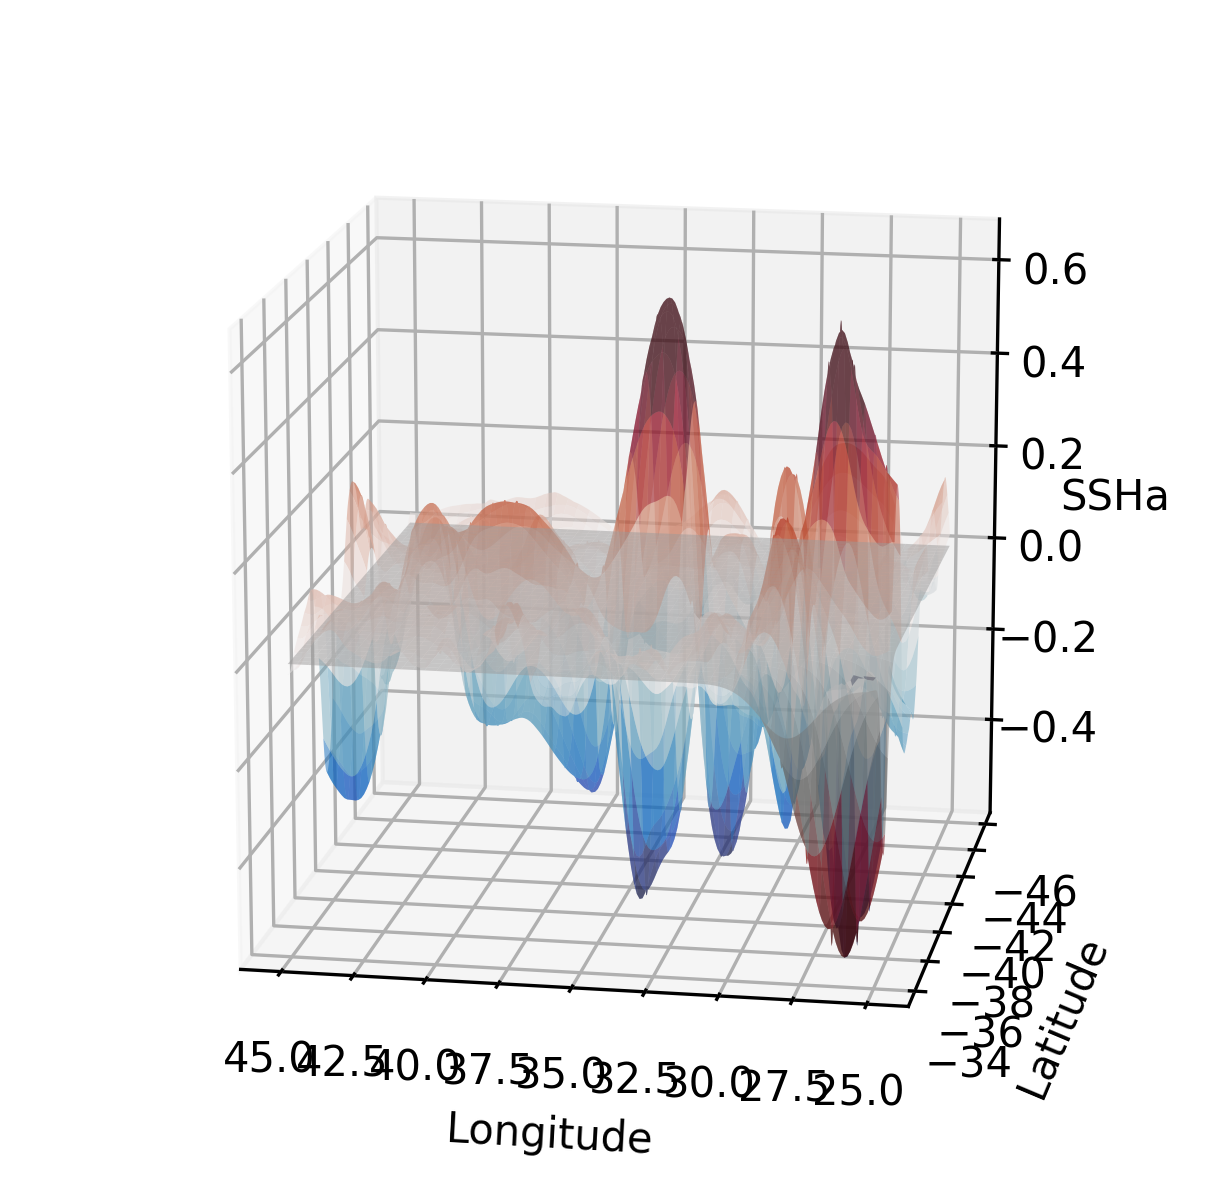

In [21]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import cmocean as cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

fig = plt.figure(figsize=(5,5),dpi=300)
ax = fig.gca(projection='3d')

Lon,Lat=meshgrid(lon, lat)
surf = ax.plot_surface(Lon[areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]],\
                       Lat[areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]],\
                       eta[0,areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]]\
                       -ssh_mean[areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]],\
                       cmap=cm.cm.balance,vmin=-0.50,vmax=0.50,\
                       alpha=0.5,shade='gouraud',antialiased=True)
#fig.colorbar(surf, shrink=0.8, aspect=10)
ssurf = ax.plot_surface(Lon[areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]],\
                       Lat[areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]],\
                       test[areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]],\
                       cmap=cm.cm.oxy,vmin=-0.50,vmax=0.50,\
                       alpha=0.5,shade='gouraud',antialiased=True)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('SSHa')
ax.view_init(15, 100)
#fig.colorbar(ssurf, shrink=0.8, aspect=10)

Text(0,0.5,'Latitude')

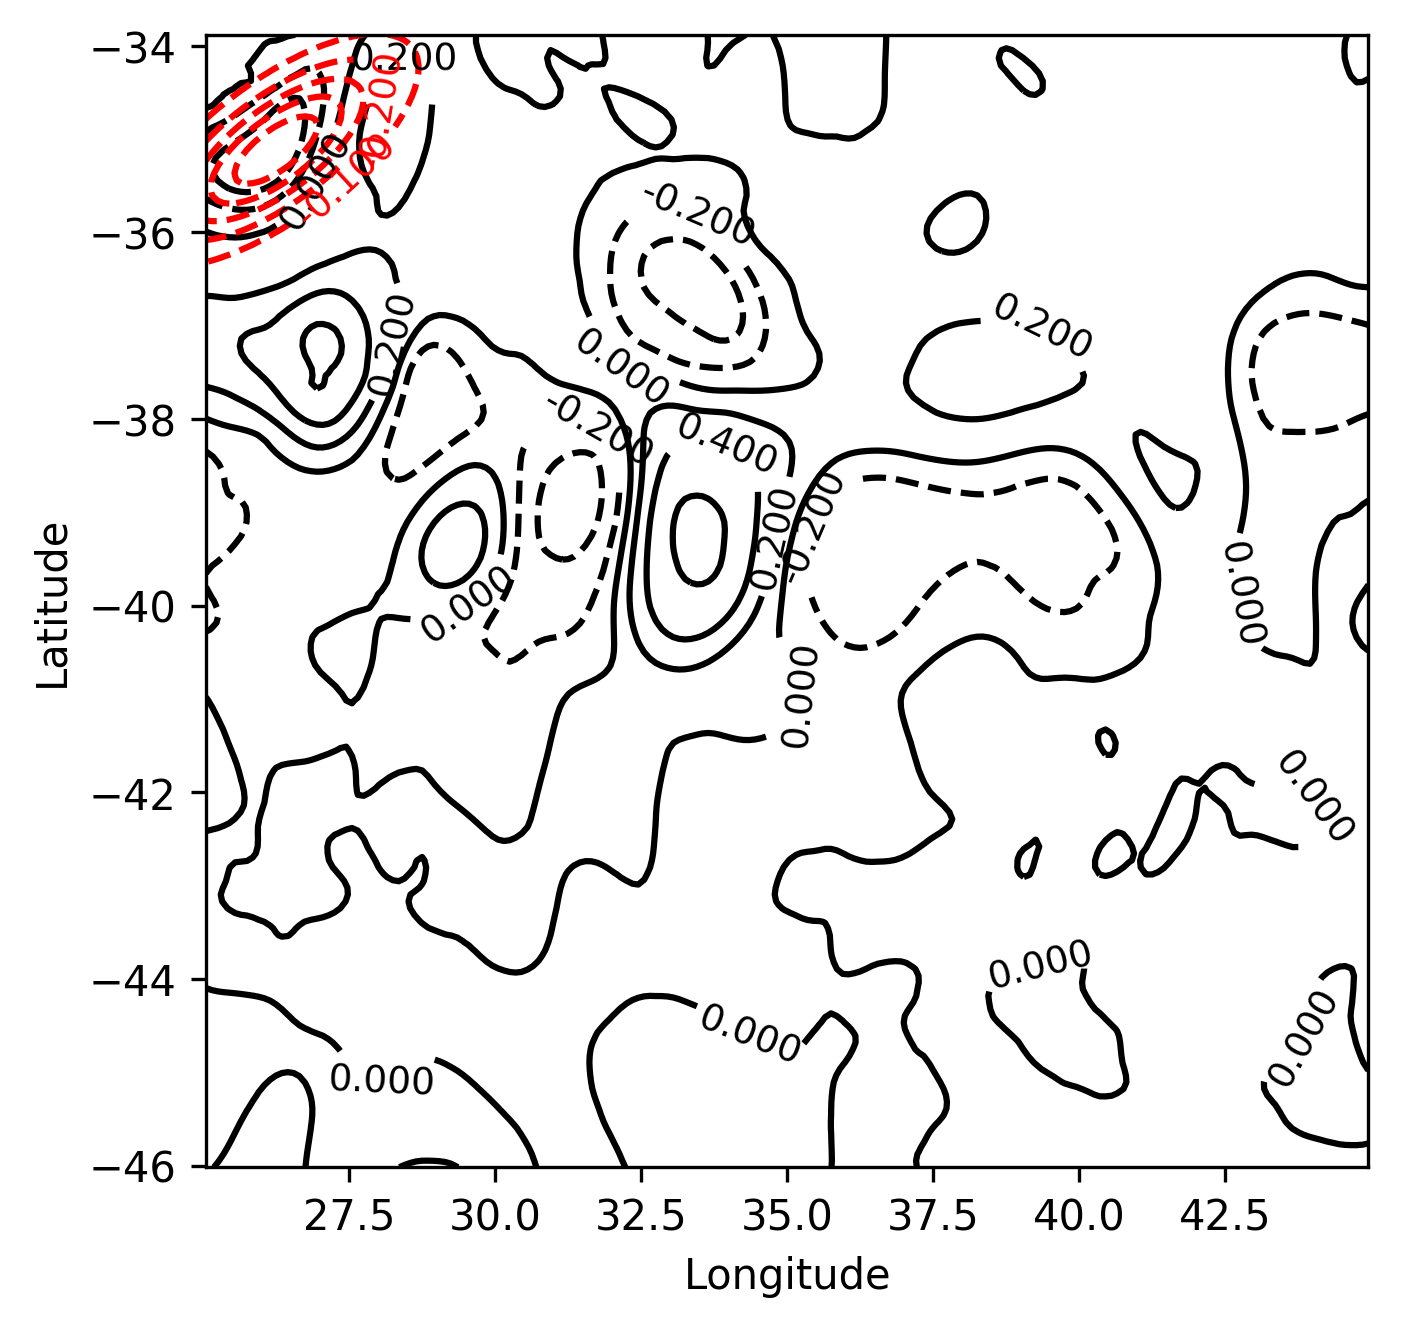

In [22]:
fig = plt.figure(figsize=(5,5),dpi=300)

CS=contour(Lon[areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]],\
                       Lat[areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]],\
                       eta[0,areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]]\
                       -ssh_mean[areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]],vmin=-0.5,vmax=0.5,colors='k')
clabel(CS, fontsize=9, inline=1)
#fig.colorbar(surf, shrink=0.8, aspect=10)

CS=contour(Lon[areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]],\
                       Lat[areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]],\
                       test[areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]],vmin=-0.5,vmax=0.5,colors='r',levels=arange(-0.5,0,0.1))
clabel(CS, fontsize=9, inline=1)

xlabel('Longitude')
ylabel('Latitude')

#ax.view_init(15, 100)
#fig.colorbar(ssurf, shrink=0.8, aspect=10)

# Plot time-steps of the original Field and Syntetic

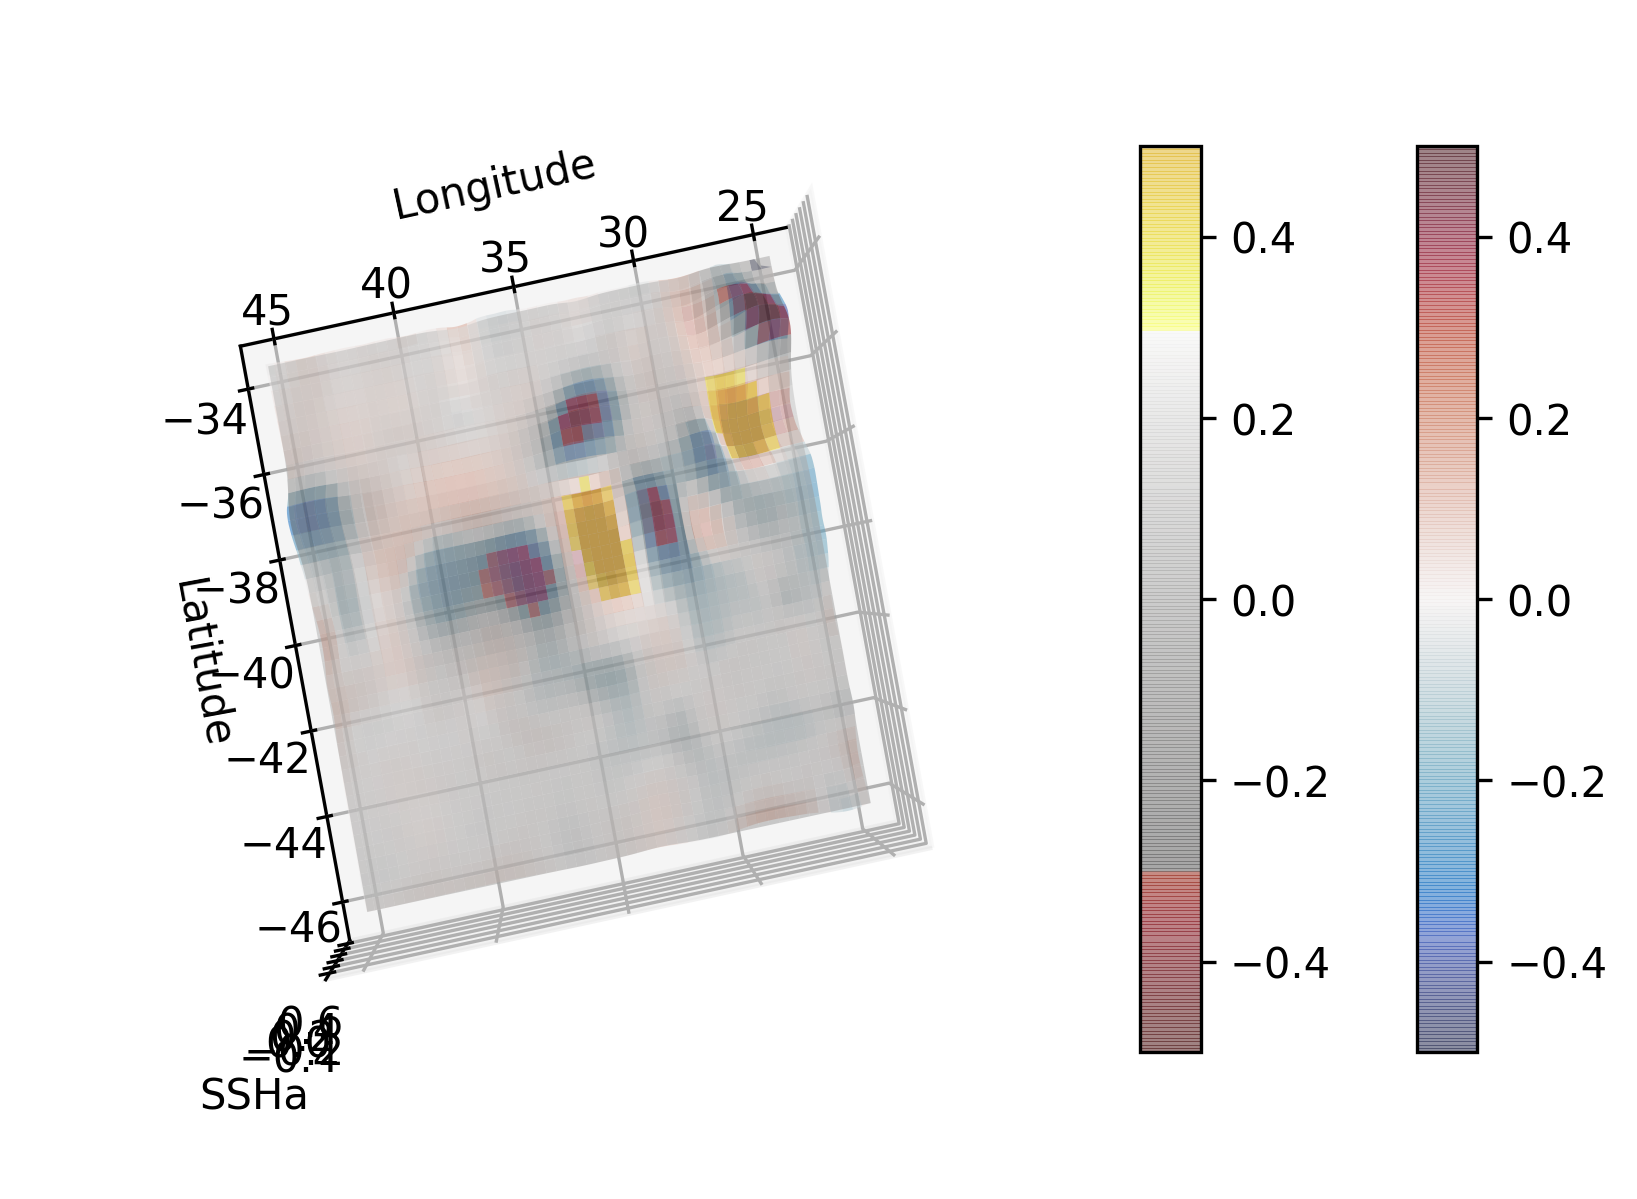

In [23]:
fig = plt.figure(figsize=(7,5),dpi=300)
ax = fig.gca(projection='3d')

Lon,Lat=meshgrid(lon, lat)
surf = ax.plot_surface(Lon[areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]],\
                       Lat[areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]],\
                       eta[0,areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]]\
                       -ssh_mean[areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]],\
                       cmap=cm.cm.balance,vmin=-0.50,vmax=0.50,\
                       alpha=0.5,shade='gouraud',antialiased=True)
fig.colorbar(surf, shrink=0.8, aspect=15)

ssurf = ax.plot_surface(Lon[areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]],\
                        Lat[areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]],\
                        fieldSp[0,areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]]\
                        +fieldSn[0,areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]],\
                        cmap=cm.cm.oxy,vmin=-0.50,vmax=0.50,\
                        alpha=0.5,shade='gouraud',antialiased=True)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('SSHa')
fig.colorbar(ssurf, shrink=0.8, aspect=15)
ax.view_init(-90, 100)

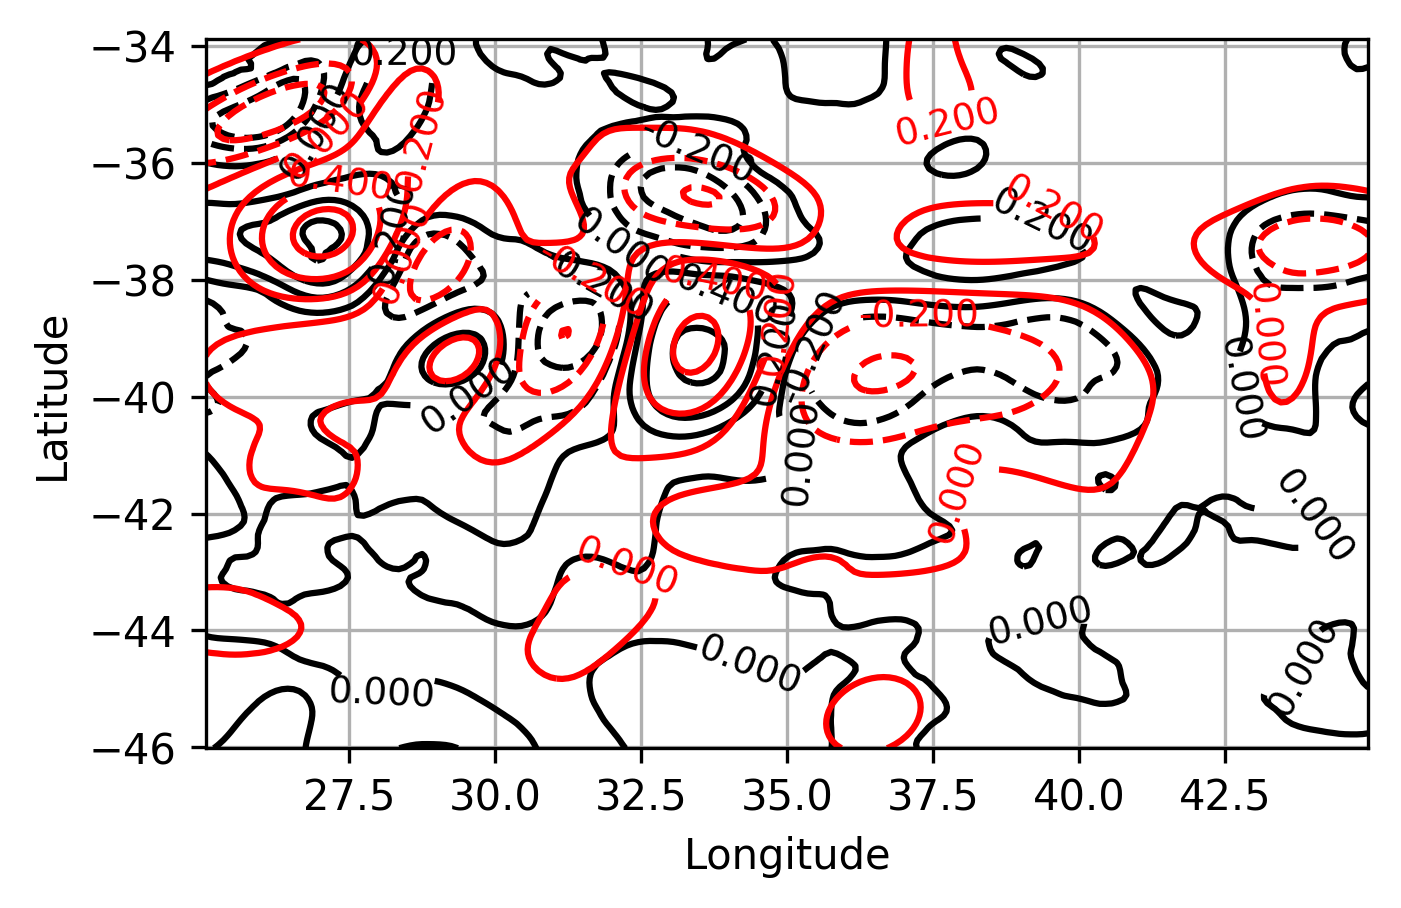

In [31]:
fig = plt.figure(figsize=(5,5),dpi=300)

CS=contour(Lon[areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]],\
                       Lat[areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]],\
                       eta[0,areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]]\
                       -ssh_mean[areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]],vmin=-0.50,vmax=0.50,colors='k')
clabel(CS, fontsize=9, inline=1)
#fig.colorbar(surf, shrink=0.8, aspect=10)

CS=contour(Lon[areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]],\
                       Lat[areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]],\
                       fieldSp[0,areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]]+\
                       fieldSn[0,areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]],\
                       vmin=-0.50,vmax=0.50,colors='r')
clabel(CS, fontsize=9, inline=1)

xlabel('Longitude')
ylabel('Latitude')

grid()
#ax.view_init(15, 100)
#fig.colorbar(ssurf, shrink=0.8, aspect=10)
plt.axes().set_aspect('equal')

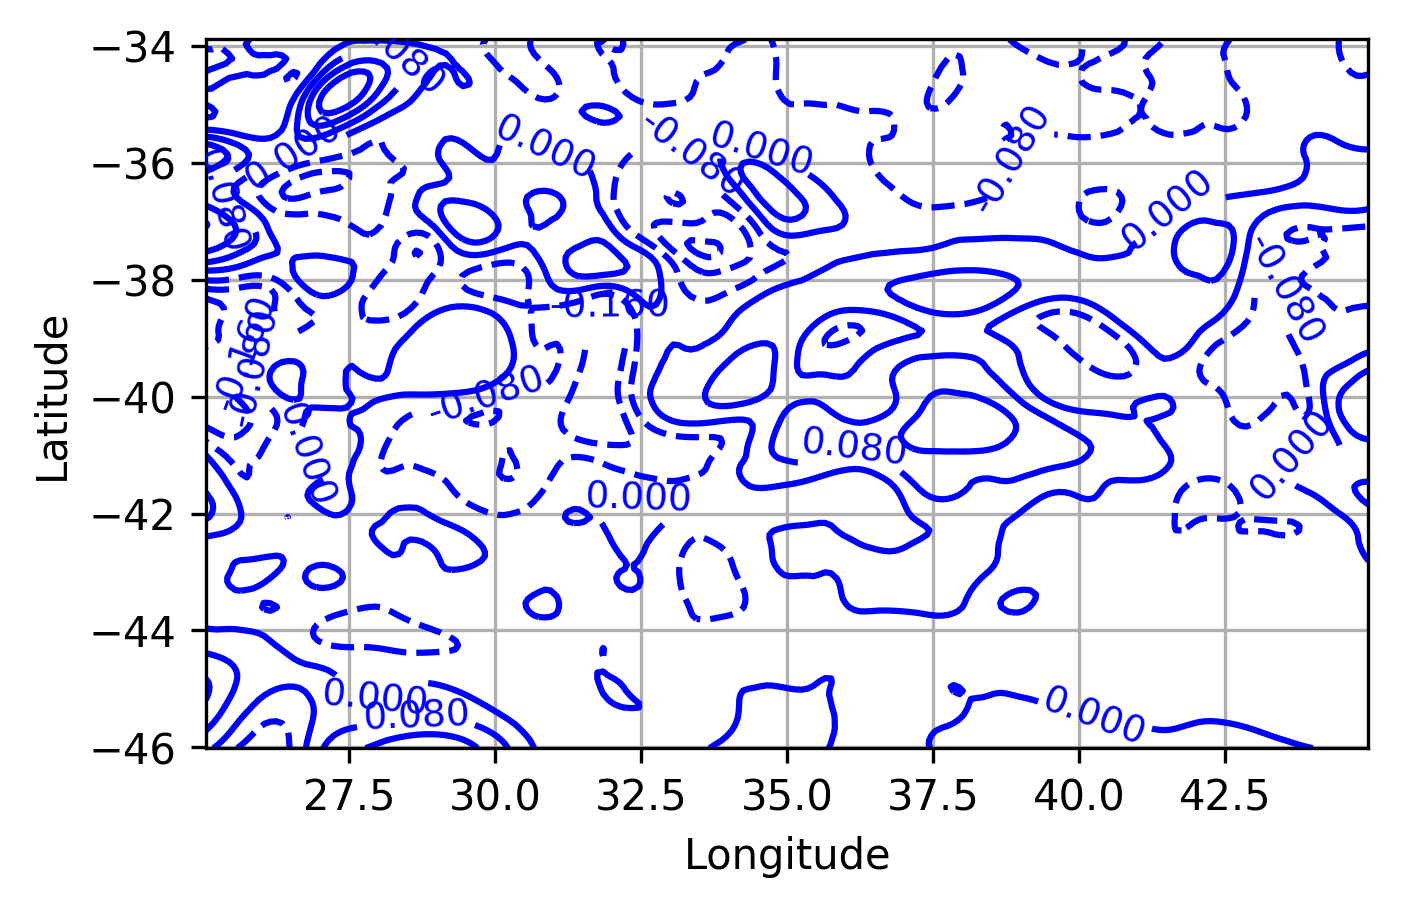

In [30]:
fig = plt.figure(figsize=(5,5),dpi=300)

CS=contour(Lon[areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]],\
                       Lat[areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]],\
                       eta[0,areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]]\
                       -ssh_mean[areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]]-\
                       (fieldSp[0,areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]]\
                        +fieldSn[0,areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]])\
                       ,vmin=-50,vmax=50,colors='b')
clabel(CS, fontsize=9, inline=1)

xlabel('Longitude')
ylabel('Latitude')

plt.axes().set_aspect('equal')
grid()

#ax.view_init(15, 100)
#fig.colorbar(ssurf, shrink=0.8, aspect=10)

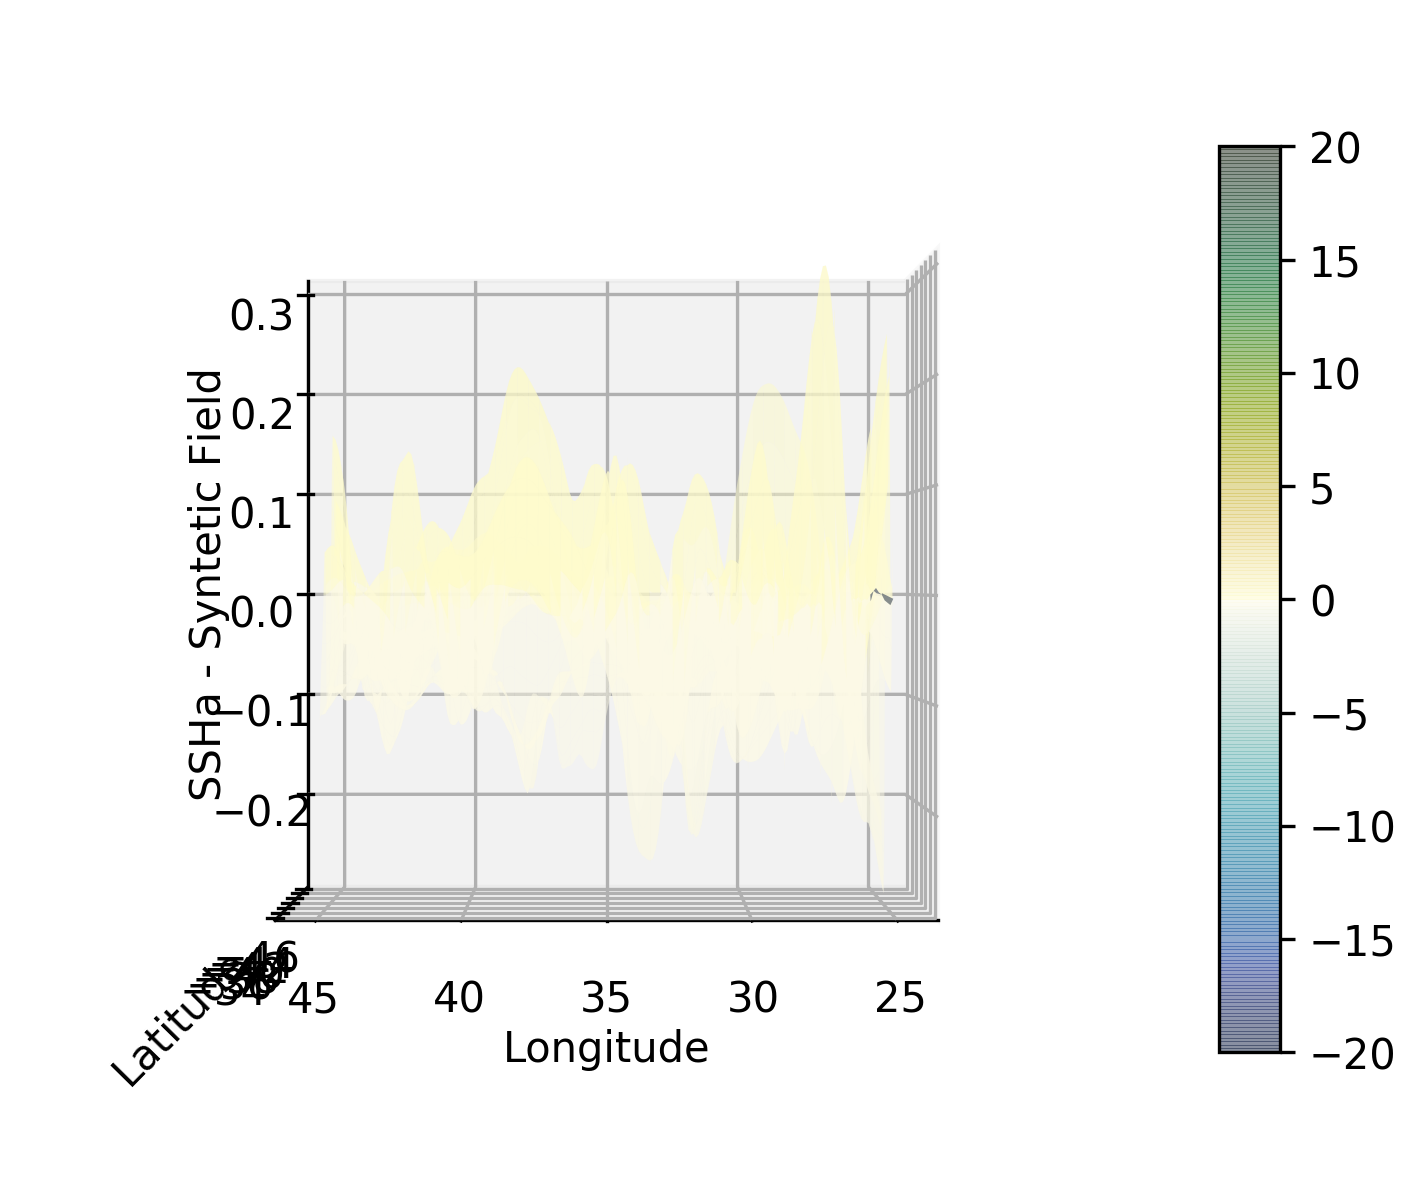

In [25]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import cmocean as cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

fig = plt.figure(figsize=(6,5),dpi=300)
ax = fig.gca(projection='3d')

Lon,Lat=meshgrid(lon, lat)
surf = ax.plot_surface(Lon[areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]],\
                       Lat[areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]],\
                       eta[0,areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]]\
                       -ssh_mean[areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]]-\
                       (fieldSp[0,areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]]\
                        +fieldSn[0,areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]]),\
                       cmap=cm.cm.delta,vmin=-20,vmax=20,\
                       alpha=0.5,shade='gouraud',antialiased=True)
fig.colorbar(surf, shrink=0.8, aspect=15)

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('SSHa - Syntetic Field')
ax.view_init(0, 90)

In [27]:
eddytdn=analyseddyzt(eta,lon,lat,0,60,1,-0.8,-0.01,-0.01,data_meant=ssh_mean,areamap=areamap,mask=''\
                     #,eccenfit=0.99,ellipsrsquarefit=0,gaussrsquarefit=0\
                     ,destdir='',physics='',diagnostics=False,pprint=False)


 0% [=>                   ]5% |Elapsed Time:61 s| Estimated Time:1220 s |N eddies: 51|

KeyboardInterrupt: 

In [ ]:
eddytdn1=analyseddyzt(eta,lon,lat,0,1,1,-18,-18,-10,data_meant=ssh_mean,areamap=areamap,mask='',\
                     eccenfit=1,ellipsrsquarefit=-1,gaussrsquarefit=-1,\
                     destdir='',physics='',diagnostics=False,pprint=False)

In [ ]:
ssha=eta-ssh_mean

In [ ]:
figure(figsize=(6,5),dpi=300)
threshold=7
color=['r','b','g','m','c']
xtext=[0.6,10.6,20.6,30.6,40.6]
#xtext=[5.6,15.6,25.6,35.6]
ytext=-3
iii=0

for ii in eddytdn1.keys(): 
    
    xidmin,xidmax=find2l(lon,lon,eddytdn1[ii]['contour'][0][0].min(),\
                         eddytdn1[ii]['contour'][0][0].max())
    yidmin,yidmax=find2l(lat,lat,eddytdn1[ii]['contour'][0][1].min(),\
                         eddytdn1[ii]['contour'][0][1].max())
    
    ssh_in_contour=ssha[0,yidmin-threshold+1:yidmax+threshold,xidmin-threshold+1:xidmax+threshold]
    lon_contour=lon[xidmin-threshold+1:xidmax+threshold]
    lat_contour=lat[yidmin-threshold+1:yidmax+threshold]
    
    
    profile,fit,checkm=extractprofeddy(eddytdn1[ii]['majoraxis'],\
                            ssh_in_contour,\
                            lon_contour,\
                            lat_contour,\
                            50,gaus='One',kind='linear',\
                            gaussrsquarefit=0.65,\
                            diagnostics=False,plotprofile=True)
    Rsquared = rsquard(profile,fit)
    plt.plot(range(0,50),profile,color[iii]+'-')
    plt.plot(range(0,50),fit,color[iii]+'--')
    if Rsquared < 0.61:
        plt.text(xtext[iii],ytext,r'$R^2$='+"%0.2f" %Rsquared,color=color[iii],\
             bbox=dict(facecolor='red', alpha=0.1))
    else:
        plt.text(xtext[iii],ytext,r'$R^2$='+"%0.2f" %Rsquared,color=color[iii],\
             bbox=dict(facecolor='green', alpha=0.1))
    

    iii=iii+1
    #plot(eddytdn1[ii]['contour'][0][0],eddytdn1[ii]['contour'][0][1])
    #show()
ylabel('SSHa (cm)')
xlabel('Position (n)')
plot(0,0,'--k',label='Fitted')
plot(0,0,'-k',label='Profile')
xlim(0,49)
legend(loc=3)

In [ ]:
figure(figsize=(6,5),dpi=300)
threshold=7
color=['r','b','g','m','c']
xtext=[5.6,15.6,25.6,35.6]
xtext=[0.6,10.6,20.6,30.6,40.6]
ytext=-3
iii=0

for ii in eddytdn1.keys(): 
    
    xidmin,xidmax=find2l(lon,lon,eddytdn1[ii]['contour'][0][0].min(),\
                         eddytdn1[ii]['contour'][0][0].max())
    yidmin,yidmax=find2l(lat,lat,eddytdn1[ii]['contour'][0][1].min(),\
                         eddytdn1[ii]['contour'][0][1].max())
    
    ssh_in_contour=ssha[0,yidmin-threshold+1:yidmax+threshold,xidmin-threshold+1:xidmax+threshold]
    lon_contour=lon[xidmin-threshold+1:xidmax+threshold]
    lat_contour=lat[yidmin-threshold+1:yidmax+threshold]
    
    
    profile,fit,checkm=extractprofeddy(eddytdn1[ii]['minoraxis'],\
                            ssh_in_contour,\
                            lon_contour,\
                            lat_contour,\
                            50,gaus='One',kind='linear',\
                            gaussrsquarefit=0.65,\
                            diagnostics=False,plotprofile=True)
    Rsquared = rsquard(profile,fit)
    plt.plot(range(0,50),profile,color[iii]+'-')
    plt.plot(range(0,50),fit,color[iii]+'--')
    if Rsquared < 0.6:
        plt.text(xtext[iii],ytext,r'$R^2$='+"%0.2f" %Rsquared,color=color[iii],\
             bbox=dict(facecolor='red', alpha=0.1))
    else:
        plt.text(xtext[iii],ytext,r'$R^2$='+"%0.2f" %Rsquared,color=color[iii],\
             bbox=dict(facecolor='green', alpha=0.1))
    

    iii=iii+1
    #plot(eddytdn1[ii]['contour'][0][0],eddytdn1[ii]['contour'][0][1])
    #show()
ylabel('SSHa (cm)')
xlabel('Position (n)')
plot(0,0,'--k',label='Fitted')
plot(0,0,'-k',label='Profile')
xlim(0,49)
legend(loc=3)

In [ ]:
eddytd3test=analyseddyzt(eta,lon,lat,0,1,1,40,10,1,data_meant=ssh_mean,areamap=areamap,mask=''\
                     ,destdir='',physics='',mode='parabolic',diagnostics=False,pprint=False)

In [ ]:
eddytd3testn=analyseddyzt(eta,lon,lat,0,1,1,-40,-10,-1,data_meant=ssh_mean,areamap=areamap,mask=''\
                     ,destdir='',physics='',mode='parabolic',diagnostics=False,pprint=False)

In [ ]:

def reconstruct_syntetic(varshape,lon,lat,eddytd,mode='gaussian',usefullfit=False,diagnostics=False):
    '''
    *************** reconstruct_syntetic *******************
    Recunstruct the syntetic field using the gaussian 
    parameters saved in the dictionary of eddies.
    Notes:
        
    Args:
        
    Returns:
        
    Usage:
    
    '''
    Lon,Lat=np.meshgrid(lon,lat)
    fieldfit=np.zeros(varshape)
    for key in eddytd.keys():
        counter=0
        for tt in range(0,len(eddytd[key]['time'])):
            ttt=eddytd[key]['time'][tt]
            curvefit=eddytd[key]['2dgaussianfit'][counter]
            if isinstance(curvefit, np.float64):
                curvefit=eddytd[key]['2dgaussianfit']
            #Remove the slope and constant in the reconstruction of the eddy.
            if mode == 'parabolic':
                fittedcurve=twoD_Paraboloid((Lon,Lat), *curvefit[0:6])
                level=eddytd[key]['level']
                print(level)
                if level>0:
                    fittedcurve[fittedcurve<0]=0
                else:
                    fittedcurve[fittedcurve>0]=0
            elif mode == 'best':
                print('Work in progress')            
            elif mode == 'both':
                print('Work in progress')
            else:
                if usefullfit==False:
                    curvefit[-1]=0
                    curvefit[-2]=0
                    curvefit[-3]=0
                #print(gaussfit)
                fittedcurve=twoD_Gaussian((Lon,Lat), *curvefit)
            fieldfit[ttt,:,:]=fieldfit[ttt,:,:]+fittedcurve.reshape(len(lat),len(lon))
            counter=counter+1
        if diagnostics==True:
            print(key)
            plt.pcolormesh(Lon,Lat,fieldfit[0,:,:])
            plt.show()
    return fieldfit

In [ ]:
fieldS3test=reconstruct_syntetic(shape(eta),lon,lat,eddytd3test,mode='parabolic')

In [ ]:
fieldS3testn=reconstruct_syntetic(shape(eta),lon,lat,eddytd3testn,mode='parabolic')

In [ ]:
pcolormesh(fieldS3test[0,:,:])

In [ ]:
pcolormesh(fieldS3testn[0,:,:])

In [ ]:
print(eddytd3test['eddyn_0']['2dgaussianfit'][0])
fieldS3testp=twoD_Paraboloid((Lon,Lat), *eddytd3test['eddyn_0']['2dgaussianfit'][0][:6]).reshape(len(lat),len(lon))
fieldS3testp[fieldS3testp<0]=0

In [ ]:
%matplotlib inline
fig = plt.figure(figsize=(7,5),dpi=100)
ax = fig.gca(projection='3d')

Lon,Lat=meshgrid(lon, lat)
surf = ax.plot_surface(Lon[areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]],\
                       Lat[areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]],\
                       eta[0,areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]]\
                       -ssh_mean[areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]],\
                       cmap=cm.cm.balance,vmin=-50,vmax=50,\
                       alpha=0.5,shade='gouraud',antialiased=True)
fig.colorbar(surf, shrink=0.8, aspect=15)

ssurf = ax.plot_surface(Lon[areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]],\
                        Lat[areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]],\
                        fieldS3testp[areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]],\
                        cmap=cm.cm.oxy,vmin=-50,vmax=50,\
                        alpha=0.5,shade='gouraud',antialiased=True)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('SSHa')
fig.colorbar(ssurf, shrink=0.8, aspect=15)
ax.view_init(0, 100)

In [ ]:
%matplotlib inline
fig = plt.figure(figsize=(7,5),dpi=100)
ax = fig.gca(projection='3d')

Lon,Lat=meshgrid(lon, lat)
surf = ax.plot_surface(Lon[areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]],\
                       Lat[areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]],\
                       eta[0,areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]]\
                       -ssh_mean[areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]],\
                       cmap=cm.cm.balance,vmin=-50,vmax=50,\
                       alpha=0.5,shade='gouraud',antialiased=True)
fig.colorbar(surf, shrink=0.8, aspect=15)

ssurf = ax.plot_surface(Lon[areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]],\
                        Lat[areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]],\
                        fieldS3test[0,areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]],\
                        cmap=cm.cm.oxy,vmin=-50,vmax=50,\
                        alpha=0.5,shade='gouraud',antialiased=True)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('SSHa')
fig.colorbar(ssurf, shrink=0.8, aspect=15)
ax.view_init(0, 100)

In [ ]:
fig = plt.figure(figsize=(5,5),dpi=300)

CS=contour(Lon[areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]],\
                       Lat[areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]],\
                       eta[0,areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]]\
                       -ssh_mean[areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]],vmin=-50,vmax=50,colors='k')
clabel(CS, fontsize=9, inline=1)
#fig.colorbar(surf, shrink=0.8, aspect=10)

CS=contour(Lon[areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]],\
                       Lat[areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]],\
                       fieldS3test[0,areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]]\
                       ,vmin=-50,vmax=50,colors='r')
clabel(CS, fontsize=9, inline=1)

xlabel('Longitude')
ylabel('Latitude')

#ax.view_init(15, 100)
#fig.colorbar(ssurf, shrink=0.8, aspect=10)

In [ ]:
u_eta,v_eta=geovelfield(eta[0,areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]]/100,\
                        lon[areamap[0,0]:areamap[0,1]],\
                        lat[areamap[1,0]:areamap[1,1]],\
                        mask[areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]])


In [ ]:
KEn=KE(u_eta,v_eta)

In [ ]:
f, (ax1, ax2) = plt.subplots(2, 1, sharey=True,figsize=(5,10),dpi=300)
ax1.pcolormesh(lon[areamap[0,0]:areamap[0,1]],\
           lat[areamap[1,0]:areamap[1,1]],\
           eta[0,areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]]/100,vmin=-.60,vmax=.60,cmap=cm.cm.balance)
#ax.colorbar()
ax1.quiver(lon[areamap[0,0]:areamap[0,1]:3],\
       lat[areamap[1,0]:areamap[1,1]:3],\
       u_eta[::3,::3],v_eta[::3,::3])
ax2.pcolormesh(lon[areamap[0,0]:areamap[0,1]],\
           lat[areamap[1,0]:areamap[1,1]],\
           KEn,vmin=0,vmax=0.5,cmap=cm.cm.tempo)
#ax1.colorbar()

In [ ]:
u_eta,v_eta=geovelfield(eta[0,areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]]/100-\
                        ssh_mean[areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]]/100,\
                        lon[areamap[0,0]:areamap[0,1]],\
                        lat[areamap[1,0]:areamap[1,1]],\
                        mask[areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]])


EKE=KE(u_eta,v_eta)

In [ ]:
f, (ax1, ax2) = plt.subplots(2, 1, sharey=True,figsize=(5,10),dpi=300)
ax1.pcolormesh(lon[areamap[0,0]:areamap[0,1]],\
           lat[areamap[1,0]:areamap[1,1]],\
           eta[0,areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]]/100-\
           ssh_mean[areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]]/100,\
           vmin=-.60,vmax=.60,cmap=cm.cm.balance)
#ax.colorbar()
ax1.quiver(lon[areamap[0,0]:areamap[0,1]:3],\
       lat[areamap[1,0]:areamap[1,1]:3],\
       u_eta[::3,::3],v_eta[::3,::3])
ax2.pcolormesh(lon[areamap[0,0]:areamap[0,1]],\
           lat[areamap[1,0]:areamap[1,1]],\
           EKE,vmin=0,vmax=0.5,cmap=cm.cm.tempo)
#ax1.colorbar()

In [ ]:
u_eddy,v_eddy=geovelfield(fieldSp[0,areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]]/100+\
                       fieldSn[0,areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]]/100,\
                        lon[areamap[0,0]:areamap[0,1]],\
                        lat[areamap[1,0]:areamap[1,1]],\
                        mask[areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]])

In [ ]:
KE_eddy=KE(u_eddy,v_eddy)
print(KE_eddy.mean())

In [ ]:
f, (ax1, ax2) = plt.subplots(2, 1, sharey=True,figsize=(5,10),dpi=300)
cbar1=ax1.pcolormesh(lon[areamap[0,0]:areamap[0,1]],\
           lat[areamap[1,0]:areamap[1,1]],\
           fieldSp[0,areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]]/100+\
           fieldSn[0,areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]]/100,vmin=-.60,vmax=.60,cmap=cm.cm.balance)
#ax.colorbar()
ax1.quiver(lon[areamap[0,0]:areamap[0,1]:3],\
       lat[areamap[1,0]:areamap[1,1]:3],\
       u_eddy[::3,::3],v_eddy[::3,::3])
cbar2=ax2.pcolormesh(lon[areamap[0,0]:areamap[0,1]],\
           lat[areamap[1,0]:areamap[1,1]],\
           KE_eddy,vmin=0,vmax=0.5,cmap=cm.cm.tempo)
#fig.colorbar(cbar2,ax=ax2)

In [ ]:
f, (ax1, ax2) = plt.subplots(2, 1, sharey=True,figsize=(6,10),dpi=300)
ax1.pcolormesh(lon[areamap[0,0]:areamap[0,1]],\
           lat[areamap[1,0]:areamap[1,1]],\
           KEn-KE_eddy,\
           vmin=0,vmax=.5,cmap=cm.cm.tempo)
fig.colorbar(cbar1,ax=ax1)
cbar2=ax2.pcolormesh(lon[areamap[0,0]:areamap[0,1]],\
           lat[areamap[1,0]:areamap[1,1]],\
           EKE-KE_eddy,vmin=0,vmax=0.5,cmap=cm.cm.tempo)
fig.colorbar(cbar2,ax=ax2)

In [ ]:
print(r'KE_e',KE_eddy.mean())
print('KE',KEn.mean())
print('EKE',EKE.mean())
print(r'KE-KE_e',(KEn-KE_eddy).mean())
print(r"EKE-KE_e",(EKE-KE_eddy).mean())

In [ ]:
u_hat,v_hat=geovelfield(eta[0,areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]]/100-\
                        (fieldSp[0,areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]]\
                        +fieldSn[0,areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]])/100,\
                        lon[areamap[0,0]:areamap[0,1]],\
                        lat[areamap[1,0]:areamap[1,1]],\
                        mask[areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]])

In [ ]:
KE_hat=KE(u_hat,v_hat)
print(KE_hat.mean())

In [ ]:
f, (ax1, ax2) = plt.subplots(2, 1, sharey=True,figsize=(6,10),dpi=300)
cbar1=ax1.pcolormesh(lon[areamap[0,0]:areamap[0,1]],\
           lat[areamap[1,0]:areamap[1,1]],\
           eta[0,areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]]/100-\
           (fieldSp[0,areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]]\
           +fieldSn[0,areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]])/100,vmin=-.6,vmax=.6,cmap=cm.cm.balance)
fig.colorbar(cbar1,ax=ax1)
Q=ax1.quiver(lon[areamap[0,0]:areamap[0,1]:3],\
       lat[areamap[1,0]:areamap[1,1]:3],\
       u_hat[::3,::3],v_hat[::3,::3])
ax1.quiverkey(Q, X=0.40, Y=1.015, U=0.5,
             label='0.5 m/s', labelpos='E')
cbar2=ax2.pcolormesh(lon[areamap[0,0]:areamap[0,1]],\
           lat[areamap[1,0]:areamap[1,1]],\
           KE_hat,vmin=0,vmax=0.5)
fig.colorbar(cbar2,ax=ax2)
#ax1.colorbar()

In [ ]:
#eddytd3test=analyseddyzt(eta,lon,lat,0,30,1,40,20,1,data_meant=ssh_mean,areamap=areamap,mask=''\
#                     ,destdir='',physics='',diagnostics=False,pprint=False)

In [ ]:
#eddytd3testn=analyseddyzt(eta,lon,lat,0,30,1,-40,-20,-1,data_meant=ssh_mean,areamap=areamap,mask=''\
#                     ,destdir='',physics='',diagnostics=False,pprint=False)

In [ ]:
#eddytd3test['eddyn_2'].keys()

In [ ]:
figure(figsize=(5,5),dpi=300)
contour(lon[areamap[0,0]:areamap[0,1]],\
        lat[areamap[1,0]:areamap[1,1]],\
        eta[0,areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]]/100-\
        ssh_mean[areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]]/100,\
        colors='red',alpha=0.3)
contour(lon[areamap[0,0]:areamap[0,1]],\
        lat[areamap[1,0]:areamap[1,1]],\
        eta[7,areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]]/100-\
        ssh_mean[areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]]/100,\
        colors='black',alpha=0.3)
eddy='eddyn_0'
plot(eddytd3[eddy]['contour'][0][0],eddytd3[eddy]['contour'][0][1],'-r',label='SSHa [t]')
plot(eddytd3[eddy]['position'][0][0],eddytd3[eddy]['position'][0][1],'or')
plot(eddytd3[eddy]['contour'][7][0],eddytd3[eddy]['contour'][7][1],'-k',label='SSHa [t+1]')
plot(eddytd3[eddy]['position'][7][0],eddytd3[eddy]['position'][7][1],'ok',alpha=0.5,label='Time-Tracking Intersection')
plot(eddytd3[eddy]['position'][7][0],eddytd3[eddy]['position'][7][1],'ok')

legend()

In [ ]:
#field_anim_P=reconstruct_syntetic(shape(eta),lon,lat,eddytd3test)
#field_anim_N=reconstruct_syntetic(shape(eta),lon,lat,eddytd3testn)

field=fieldSp[:,areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]]+\
      fieldSn[:,areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]] 
    
0,7,15,23,31,39,47,55

In [ ]:
for ii in range(0,60):
    f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(10,5.5),dpi=300)
    ax1.pcolormesh(lon[areamap[0,0]+80:areamap[0,1]],\
               lat[areamap[1,0]:areamap[1,1]],\
               eta[ii,areamap[1,0]:areamap[1,1],areamap[0,0]+80:areamap[0,1]]/100-\
               ssh_mean[areamap[1,0]:areamap[1,1],areamap[0,0]+80:areamap[0,1]]/100,cmap=cm.cm.balance,vmin=-0.50,vmax=0.50)
    ax1.set_title('SSHa Field',fontsize=20)
    ax1.tick_params(axis='both', labelsize=18)
    ax2.pcolormesh(lon[areamap[0,0]+80:areamap[0,1]],\
               lat[areamap[1,0]:areamap[1,1]],\
               field[ii,:,80::]/100,cmap=cm.cm.balance,vmin=-0.50,vmax=0.50)
    ax2.set_title('Reconstructed Field',fontsize=20)
    ax2.tick_params(axis='both', labelsize=18)
    plt.suptitle('Time = %2d Days' % ii,fontsize=22)
    show()

In [ ]:
vargeonc('/home/156/jm5970/github/trackeddy/output/syntetic_field.nc',lat[areamap[1,0]:areamap[1,1]],lon[areamap[0,0]:areamap[0,1]],\
         field[0:15,:,:]/100,15,'syntetic_field',nc_description='Syntetic Field Data',units='m',dt='',dim='2D',format='NETCDF3_CLASSIC')

In [ ]:
vargeonc('/home/156/jm5970/github/trackeddy/output/syntetic_field_p.nc',lat[areamap[1,0]:areamap[1,1]],lon[areamap[0,0]:areamap[0,1]],\
         fieldSp[0:15,areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]]/100,15,'syntetic_pos',nc_description='Syntetic Field Data',units='m',dt='',dim='2D',format='NETCDF3_CLASSIC')
vargeonc('/home/156/jm5970/github/trackeddy/output/syntetic_field_n.nc',lat[areamap[1,0]:areamap[1,1]],lon[areamap[0,0]:areamap[0,1]],\
         fieldSn[0:15,areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]]/100,15,'syntetic_neg',nc_description='Syntetic Field Data',units='m',dt='',dim='2D',format='NETCDF3_CLASSIC')

In [ ]:
vargeonc('/home/156/jm5970/github/trackeddy/output/ssha_field.nc',lat[areamap[1,0]:areamap[1,1]],lon[areamap[0,0]:areamap[0,1]],\
         eta[0:15,areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]]/100-\
         ssh_mean[areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]]/100,\
         15,'ssha',nc_description='SSHa Field Data',units='m',dt='',dim='2D',format='NETCDF3_CLASSIC')


In [ ]:
vargeonc('/home/156/jm5970/github/trackeddy/output/difference.nc',lat[areamap[1,0]:areamap[1,1]],lon[areamap[0,0]:areamap[0,1]],\
         eta[0:15,areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]]/100-\
         ssh_mean[areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]]/100-field[0:15,:,:]/100,\
         15,'diff',nc_description='SSHa - Syntetic Field Data',units='m',dt='',dim='2D',format='NETCDF3_CLASSIC')



In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(10,5),dpi=300)
ax1.pcolormesh(lon[areamap[0,0]:areamap[0,1]],\
               lat[areamap[1,0]:areamap[1,1]],\
               field[0,:,:])
ax2.pcolormesh(lon[areamap[0,0]:areamap[0,1]],\
               lat[areamap[1,0]:areamap[1,1]],\
               eta[0,areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]]/100-\
               ssh_mean[areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]]/100)
title('T = %d' %ii )
show()

In [ ]:
pos=[0.907033126853,0.905227377193,0.905227377175,0.896713495381,0.895396119365,0.895396119355,0.887947727673,0.879303841427,\
    0.877538989216,0.877538989143,0.996401314707,0.875376438784,0.865807326165,0.99426403602,0.865807326108,0.992023244025,\
    0.859905310447,0.989980644565,0.98675760525,0.984807638574,0.981637480104,0.980019241931,0.980019241932,0.978894597114,\
    0.977386804328,0.972922025433,0.972922025437,0.82536581074,0.970862780922,0.965263172995,0.931643746824,0.965263172993,\
    0.885367415283,\
    0.941499929064,0.938317301291,0.95985520007,0.919666316164,0.955782427138,0.915078886188,0.937961977254,0.930120293033,\
    0.934582575989,0.923709221989,0.934582576063,0.92370922199,0.916025591068,0.899207613561,0.915028977272,0.899207613603,\
    0.908203455515,0.95346591152,0.894998924178,0.897736249125,0.952249663496,0.906437296344,0.896585258974,0.952249663511,\
    0.902427461656,0.88817539644,0.95224966351,0.877104963321,0.889625874702,0.945381573588,0.849793864555,0.889625874384,\
    0.945822894719,0.821544709487,0.881775384363,0.817628508883,0.88123311218,0.793220310797,0.88123311184,0.760273730862,\
    0.86537364232,0.75376806036,0.872222879121,0.728150996819,0.85587165359,0.724655822299,0.84641592454,0.699307761874,\
    0.845879696228,0.671558411347,0.835792715455]
print(mean(pos),len(pos))

In [ ]:
eddytdp=analyseddyzt(eta,lon,lat,0,1,1,40,5,5,data_meant=ssh_mean,areamap=array([[0,len(lon)],[0,len(lat)]]),\
                     mask='',\
                     destdir='',physics='',diagnostics=False,pprint=False)

In [ ]:
eddytdn=analyseddyzt(eta,lon,lat,0,1,1,-40,-5,-5,data_meant=ssh_mean,areamap=array([[0,len(lon)],[0,len(lat)]]),\
                     mask='',\
                     destdir='',physics='',diagnostics=False,pprint=False)

In [ ]:
southernn=reconstruct_syntetic(shape(eta),lon,lat,eddytdn)
southernp=reconstruct_syntetic(shape(eta),lon,lat,eddytdp)
southern=southernn+southernp

In [ ]:
pcolormesh(southern[0,:,:])

In [ ]:
pcolormesh(eta[0,600:,2500:]-ssh_mean[600:,2500:])

In [ ]:

from mpl_toolkits.basemap import Basemap

fig, ax = plt.subplots(2, 1, figsize=(12,10),dpi=300)


latcorners = lat[:]
loncorners = lon[:]
lon_0=lon[2700]
lat_0=lat[600]

llon,latt=meshgrid(lon[2700:],lat[600:])

m = Basemap(projection='merc',lon_0=lon_0,lat_0=90.,lat_ts=lat_0,\
            rsphere=(6378137.00,6356752.3142),\
            llcrnrlat=latcorners[0],urcrnrlat=latcorners[-1],\
            llcrnrlon=loncorners[0],urcrnrlon=loncorners[-1],\
            resolution='l',area_thresh=10000,ax=ax[0])

m.drawcoastlines()
m.fillcontinents()
m.drawparallels(np.arange(-10,-90,-10),labels=[1,1,0,1],fontsize=22)
# draw meridians
m.drawmeridians(np.arange(-180,180,30),labels=[1,1,0,1],fontsize=22)
Lon,Lat=m(llon,latt)
ax[0].pcolormesh(Lon,Lat,eta[0,600:,2700:]-ssh_mean[600:,2700:],cmap=cm.cm.balance)
tt=ax[0].set_title('SSHa', fontsize=30)
tt.set_position([.5, 1.001])
m = Basemap(projection='merc',lon_0=lon_0,lat_0=90.,lat_ts=lat_0,\
            rsphere=(6378137.00,6356752.3142),\
            llcrnrlat=latcorners[0],urcrnrlat=latcorners[-1],\
            llcrnrlon=loncorners[0],urcrnrlon=loncorners[-1],\
            resolution='l',area_thresh=10000,ax=ax[1])

m.drawcoastlines()
m.fillcontinents()
m.drawparallels(np.arange(-10,-90,-10),labels=[1,1,0,1],fontsize=22)
# draw meridians
m.drawmeridians(np.arange(-180,180,30),labels=[1,1,0,1],fontsize=22)
Lon,Lat=m(llon,latt)
ax[1].pcolormesh(Lon,Lat,southern[0,600:,2700:],cmap=cm.cm.balance)
ttl=ax[1].set_title('Reconstructed Field', fontsize=30)
ttl.set_position([.5, 1.001])
 
#basemap_mplot(lon[2700:],lat[600:],[eta[0,600:,2700:]-ssh_mean[600:,2700:],southern[0,600:,2700:]],\
#              ['SSHa','Reconstructed_field'],projection='merc',lat_0=-90,lon_0=-100,boundinglat=-30,\
#              resolution='c',scale='Lin',vmin=-50,vmax=50,cmap=cm.cm.balance,xan=1,yan=2,figsize=(10,10),fontsize=15)

In [ ]:
def geovelfield(ssha,lon,lat,mask,value):
    ma.filled(ssha,np.nan)
    distmlon=sw.dist(0,lon,'km')[0][:]*1000
    distmlat=sw.dist(0,lat,'km')[0][:]*1000
    mlon=np.cumsum(distmlon)
    mlat=np.cumsum(distmlat)
    dy=np.gradient(mlat)
    dx=np.gradient(mlon)
    detay,detax=np.gradient(ssha)
    omega = 7.2921e-5
    g=9.81
    f=2*omega*np.sin(np.deg2rad(lat))
    u=np.zeros(np.shape(ssha))
    v=np.zeros(np.shape(ssha))
    for ii in range(np.shape(ssha)[1]-1):
        detaxdy=detax[:,ii]/dx[ii]
        v[:,ii]=(g/f)*(detaxdy)
    for jj in range(np.shape(ssha)[0]-1):
        detaydx=detay[jj,:]/dy[jj]
        u[jj,:]=-(g/f[jj])*(detaydx)
    u[u>value]=nan
    v[v>value]=nan
    u[u<-value]=nan
    v[v<-value]=nan
    u= np.ma.masked_array(u, mask)
    v= np.ma.masked_array(v, mask)
    return u,v

In [ ]:
u_eta,v_eta=geovelfield(eta[0,:,:]/100,loncorners,latcorners,mask[:,:],5)
KEn=KE(u_eta,v_eta)

In [ ]:
u_eta,v_eta=geovelfield(eta[0,:,:]/100-ssh_mean[:,:]/100,loncorners,latcorners,mask[:,:],5)
EKE=KE(u_eta,v_eta)

In [ ]:
u_eddy,v_eddy=geovelfield(southern[0,:,:]/100,loncorners,latcorners,mask[:,:],5)
KE_eddy=KE(u_eddy,v_eddy)

In [ ]:
f, ax = plt.subplots(2, 4, sharey=True, sharex=True,figsize=(21,6),dpi=300)
print(ax)
cbar1=ax[0,0].pcolormesh(loncorners,latcorners,\
           eta[0,:,:]/100,\
           vmin=-0.5,vmax=.5,cmap=cm.cm.balance)
ax[1,0].pcolormesh(loncorners,latcorners,\
           KEn,vmin=0,vmax=0.5,cmap=cm.cm.tempo)
ax[0,1].pcolormesh(loncorners,latcorners,\
           eta[0,:,:]/100-ssh_mean[:,:]/100,\
           vmin=-0.5,vmax=.5,cmap=cm.cm.balance)
ax[1,1].pcolormesh(loncorners,latcorners,\
           EKE,vmin=0,vmax=0.5,cmap=cm.cm.tempo)
ax[0,2].pcolormesh(loncorners,latcorners,\
           southern[0,:,:]/100,\
           vmin=-0.5,vmax=.5,cmap=cm.cm.balance)
cbar2=ax[1,2].pcolormesh(loncorners,latcorners,\
           KE_eddy,vmin=0,vmax=0.5,cmap=cm.cm.tempo)
ax[0,3].pcolormesh(loncorners,latcorners,\
           KEn-KE_eddy,\
           vmin=0,vmax=.5,cmap=cm.cm.tempo)
fig.colorbar(cbar1,ax=ax[0,3])
cbar2=ax[1,3].pcolormesh(loncorners,latcorners,\
           EKE-KE_eddy,vmin=0,vmax=0.5,cmap=cm.cm.tempo)
fig.colorbar(cbar2,ax=ax[1,3])

In [ ]:
print(r'KE_e',KE_eddy.mean())
print('KE',KEn.mean())
print('EKE',EKE.mean())
print(r'KE-KE_e',(KEn-KE_eddy).mean())
print(r"EKE-KE_e",(EKE-KE_eddy).mean())

In [ ]:
vargeonc('/home/156/jm5970/github/trackeddy/output/syntetic_field.nc',loncorners,latcorners,\
         southern[0,600:,2700:]/100,1,'syntetic_field',nc_description='Syntetic Field Data',units='m',dt='',dim='2D',format='NETCDF3_CLASSIC')
vargeonc('/home/156/jm5970/github/trackeddy/output/syntetic_field_p.nc',loncorners,latcorners,\
         southernp[0,600:,2700:]/100,1,'syntetic_pos',nc_description='Syntetic Field Data',units='m',dt='',dim='2D',format='NETCDF3_CLASSIC')
vargeonc('/home/156/jm5970/github/trackeddy/output/syntetic_field_n.nc',loncorners,latcorners,\
         southernn[0,600:,2700:]/100,1,'syntetic_neg',nc_description='Syntetic Field Data',units='m',dt='',dim='2D',format='NETCDF3_CLASSIC')

vargeonc('/home/156/jm5970/github/trackeddy/output/ssha_field.nc',loncorners,latcorners,\
           eta[0,600:,2700:]/100-ssh_mean[600:,2700:]/100,\
         1,'ssha',nc_description='SSHa Field Data',units='m',dt='',dim='2D',format='NETCDF3_CLASSIC')
